<div style=" background-color: RGB(170,46,34);" >
<h1 style="margin: auto; padding: 20px 0; color:white; text-align: center">PROJET 6 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:white; text-align: center">Analysez les ventes d'une librairie avec R ou Python</h2>
</div>

<div style="background-color: RGB(170,46,34);" >
<h2 style="margin: auto; padding: 20px; color: white">Partie 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(170,46,34);" >
<h3 style="margin: auto; padding: 20px; color: RGB(170,46,34); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Librairies utilisées pour le calcul
import pandas as pd
import numpy as np

#Librairie utilisée pour la gestion des dates
import datetime as dt

#Librairies utilisées pour la visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

#Librairies utilisées pour les statistiques
from scipy.stats import zscore
from scipy.stats import anderson
from scipy.stats import chi2_contingency
from scipy.stats import bartlett


import scipy.stats as st

<div style="border: 1px solid RGB(170,46,34);" >
<h3 style="margin: auto; padding: 20px; color: RGB(170,46,34); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
#Importation du fichier Transactions.csv
df_transactions = pd.read_csv(r'C:\Users\steph\Desktop\Openclassrooms\Data Analyst\P6\01 - Ressources\BDD\BDD\Transactions.csv', delimiter=";")

#Importation du fichier customers.csv
df_clients = pd.read_csv(r'C:\Users\steph\Desktop\Openclassrooms\Data Analyst\P6\01 - Ressources\BDD\BDD\customers.csv', delimiter=";")

#Importation du fichier products.csv
df_produits = pd.read_csv(r'C:\Users\steph\Desktop\Openclassrooms\Data Analyst\P6\01 - Ressources\BDD\BDD\products.csv', delimiter=";")

<div style="background-color: RGB(170,46,34);" >
<h2 style="margin: auto; padding: 20px; color:white; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(170,46,34);" >
<h3 style="margin: auto; padding: 20px; color: RGB(170,46,34); ">2.1 - Analyse exploratoire du fichier transactions</h3>
</div>

In [3]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_transactions.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_transactions.shape[1]))

Le tableau comporte 687534 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)


In [4]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_transactions.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     687534 non-null  object
 1   date        687534 non-null  object
 2   session_id  687534 non-null  object
 3   client_id   687534 non-null  object
dtypes: object(4)
memory usage: 21.0+ MB


In [5]:
#Modification du type de la colonne date en datetime
df_transactions['date'] = df_transactions['date'].str.split(' ').str[0]
df_transactions['date'] = pd.to_datetime(df_transactions['date'])

In [6]:
#Suppression des heures dans le dataframe des transactions
#Split de la date pour de futurs calculs
#df_transactions['date_jour'] = df_transactions['date'].str.split(' ').str[0]
df_transactions['annee'] = df_transactions['date'].dt.year
df_transactions['mois'] = df_transactions['date'].dt.month
df_transactions['jour'] = df_transactions['date'].dt.day

In [7]:
#Ajout d'une colonne pour convertir la date en timestamp
df_transactions['date_timestamp'] = pd.to_datetime(df_transactions['date']).apply(lambda x: int(x.timestamp()))

In [8]:
df_transactions.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id_prod         687534 non-null  object        
 1   date            687534 non-null  datetime64[ns]
 2   session_id      687534 non-null  object        
 3   client_id       687534 non-null  object        
 4   annee           687534 non-null  int64         
 5   mois            687534 non-null  int64         
 6   jour            687534 non-null  int64         
 7   date_timestamp  687534 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 42.0+ MB


In [9]:
#Affichage des 5 premières lignes de la table
df_transactions.head()

,id_prod,date,session_id,client_id,annee,mois,jour,date_timestamp
0,0_1259,2021-03-01,s_1,c_329,2021,3,1,1614556800
1,0_1390,2021-03-01,s_2,c_664,2021,3,1,1614556800
2,0_1352,2021-03-01,s_3,c_580,2021,3,1,1614556800
3,0_1458,2021-03-01,s_4,c_7912,2021,3,1,1614556800
4,0_1358,2021-03-01,s_5,c_2033,2021,3,1,1614556800


<div style="border: 1px solid RGB(170,46,34);" >
<h3 style="margin: auto; padding: 20px; color: RGB(170,46,34); ">2.2 - Analyse exploratoire du fichier clients</h3>
</div>

In [10]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_clients.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_clients.shape[1]))

Le tableau comporte 8621 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [11]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_clients.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8621 entries, 0 to 8620
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [12]:
#Ajout de la colonne "Age"
date_du_jour = dt.date.today()
df_clients['age'] = date_du_jour.year - df_clients['birth']

In [13]:
#Affichage des 5 premières lignes de la table
df_clients.head()

,client_id,sex,birth,age
0,c_4410,f,1967,56
1,c_7839,f,1975,48
2,c_1699,f,1984,39
3,c_5961,f,1962,61
4,c_5320,m,1943,80


<div style="border: 1px solid RGB(170,46,34);" >
<h3 style="margin: auto; padding: 20px; color: RGB(170,46,34); ">2.3 - Analyse exploratoire du fichier produits</h3>
</div>

In [14]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_produits.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_produits.shape[1]))

Le tableau comporte 3286 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [15]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_produits.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.1+ KB


In [16]:
#Affichage des 5 premières lignes de la table
df_produits.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


<div style="background-color: RGB(170,46,34);" >
<h2 style="margin: auto; padding: 20px; color:white; ">Etape 3 - Rapprochement des dataframes</h2>
</div>

<div style="border: 1px solid RGB(170,46,34);" >
<h3 style="margin: auto; padding: 20px; color: RGB(170,46,34); ">3.1 - Jointures entre les dataframes df_produits et df_transactions</h3>
</div>

In [17]:
#Jointure externe entre les dataframe df_produits et df_transactions
df_merge_produits_transactions = df_transactions.merge(df_produits, on="id_prod", how="inner")
print("Le tableau comporte {} observation(s) ou article(s)".format(df_merge_produits_transactions.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_merge_produits_transactions.shape[1]))

Le tableau comporte 687534 observation(s) ou article(s)
Le tableau comporte 10 colonne(s)


In [18]:
df_merge_produits_transactions.head()

,id_prod,date,session_id,client_id,annee,mois,jour,date_timestamp,price,categ
0,0_1259,2021-03-01,s_1,c_329,2021,3,1,1614556800,11.99,0
1,0_1259,2021-03-01,s_202,c_1599,2021,3,1,1614556800,11.99,0
2,0_1259,2021-03-04,s_1519,c_1609,2021,3,4,1614816000,11.99,0
3,0_1259,2021-03-05,s_2114,c_107,2021,3,5,1614902400,11.99,0
4,0_1259,2021-03-07,s_2976,c_4215,2021,3,7,1615075200,11.99,0


<div style="border: 1px solid RGB(170,46,34);" >
<h3 style="margin: auto; padding: 20px; color: RGB(170,46,34); ">3.2 - Jointures entre les dataframes df_merge_produits_transactions et df_clients</h3>
</div>

In [19]:
#Jointure externe entre les dataframe df_merge_produits_transactions et df_clients
df_final = df_merge_produits_transactions.merge(df_clients, on="client_id", how="inner")
print("Le tableau comporte {} observation(s) ou article(s)".format(df_final.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_final.shape[1]))

Le tableau comporte 687534 observation(s) ou article(s)
Le tableau comporte 13 colonne(s)


In [20]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_final.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687534 entries, 0 to 687533
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id_prod         687534 non-null  object        
 1   date            687534 non-null  datetime64[ns]
 2   session_id      687534 non-null  object        
 3   client_id       687534 non-null  object        
 4   annee           687534 non-null  int64         
 5   mois            687534 non-null  int64         
 6   jour            687534 non-null  int64         
 7   date_timestamp  687534 non-null  int64         
 8   price           687534 non-null  float64       
 9   categ           687534 non-null  int64         
 10  sex             687534 non-null  object        
 11  birth           687534 non-null  int64         
 12  age             687534 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(4)
memory usage: 73.4+ MB


In [21]:
#Ajout d'une colonne pour les tranches d'âge des clients => utile pour certains calculs par la suite

# On définit les tranches d'âge
age_bins = [18, 25, 35, 45, 55, 65, 75, 85, 120]
age_labels = ['18-24 ans', '25-34 ans', '35-44 ans', '45-54 ans', '55-64 ans', '65-74 ans', '75-84 ans', '85 ans et plus']

# On créé une nouvelle colonne "tranche_age" dans le dataframe initial
df_final['tranche_age'] = pd.cut(df_final['age'], bins=age_bins, labels=age_labels, right=False)

In [22]:
df_final.head()

,id_prod,date,session_id,client_id,annee,mois,jour,date_timestamp,price,categ,sex,birth,age,tranche_age
0,0_1259,2021-03-01,s_1,c_329,2021,3,1,1614556800,11.99,0,f,1967,56,55-64 ans
1,0_1259,2022-10-01,s_275943,c_329,2022,10,1,1664582400,11.99,0,f,1967,56,55-64 ans
2,0_1259,2022-12-01,s_305291,c_329,2022,12,1,1669852800,11.99,0,f,1967,56,55-64 ans
3,0_1259,2023-01-01,s_320153,c_329,2023,1,1,1672531200,11.99,0,f,1967,56,55-64 ans
4,1_397,2021-11-23,s_123998,c_329,2021,11,23,1637625600,18.99,1,f,1967,56,55-64 ans


<div style="background-color: RGB(170,46,34);" >
<h2 style="margin: auto; padding: 20px; color: white;">Partie 4 - Analyse des différents indicateurs de vente et du chiffre d'affaires</h2>
</div>

<div style="border: 1px solid RGB(170,46,34);" >
<h3 style="margin: auto; padding: 20px; color: RGB(170,46,34); ">4.1 - Chiffre d'affaires depuis le lancement de la boutique en ligne</h3>
</div>

In [23]:
#Calcul du chiffre d'affaires
chiffre_affaires = df_final['price'].sum()
#Calcul du nombre de ventes
nombre_ventes = df_final['session_id'].count()

print("Le chiffre d'affaires global réalisé depuis le lancement du site est de", "{:,.2f}".format(chiffre_affaires), "€ pour un total de", "{:,.0f}".format(nombre_ventes), "ventes.", end="\n\n")

Le chiffre d'affaires global réalisé depuis le lancement du site est de 12,027,663.10 € pour un total de 687,534 ventes.



<div style="border: 1px solid RGB(170,46,34);" >
<h3 style="margin: auto; padding: 20px; color: RGB(170,46,34); ">4.2 - Chiffres d'affaires annuels</h3>
</div>

In [24]:
#Calcul des chiffres d'affaires par année
ca_par_annee = df_final.groupby(df_final['annee'])['price'].sum()
print("Chiffres d'affaires annuels :\n",ca_par_annee, end="\n\n")

#Calcul du nombre de ventes par année
#ventes_par_annee = df_final.groupby(df_final['annee'])['session_id'].count()
#print("Nombre de ventes annuelles :\n",ventes_par_annee)

Chiffres d'affaires annuels :
 annee
2021    4944760.98
2022    6108681.81
2023     974220.31
Name: price, dtype: float64



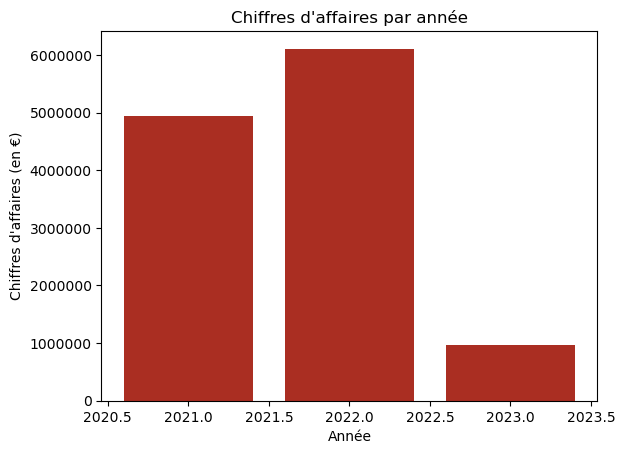

In [25]:
# Création du graphique en barres
plt.bar(ca_par_annee.index, ca_par_annee.values, color="#AA2E22")

# Ajout des étiquettes et du titre
plt.xlabel("Année")
plt.ylabel("Chiffres d\'affaires (en €)")
plt.title("Chiffres d\'affaires par année")

plt.ticklabel_format(style='plain')  # Ne pas utiliser la notation scientifique


# Affichage du graphique
plt.show()

In [26]:
print(df_final["date"].nlargest(1))

2874   2023-02-28
Name: date, dtype: datetime64[ns]


On constate une évolution du chiffre d'affaires entre 2021 et 2022, puis une baisse du chiffre d'affaires en 2023. Néanmoins, la dernière transaction renseignée dans le dataframe date du 28/02/2023. On ne peut donc pas statuer sur une baisse du chiffre d'affaires en 2023, il faut donc maintenant faire une analyse des chiffres d'affaires par trimestre.

<div style="border: 1px solid RGB(170,46,34);" >
<h3 style="margin: auto; padding: 20px; color: RGB(170,46,34); ">4.3 - Chiffres d'affaires trimestriels</h3>
</div>

In [27]:
#Calcul des chiffres d'affaires par trimestre
ca_par_trimestre = df_final.groupby(pd.Grouper(key="date", freq="Q"))['price'].sum()
print("Chiffres d'affaires par trimestre :\n",ca_par_trimestre, end="\n\n")

#Calcul du nombre de ventes par mois et par année
#ventes_par_trimestre = df_final.groupby(pd.Grouper(key="date", freq="Q"))['session_id'].count()
#print("Nombre de ventes par trimestre :\n",ventes_par_trimestre)

Chiffres d'affaires par trimestre :
 date
2021-03-31     482440.61
2021-06-30    1453141.33
2021-09-30    1472360.87
2021-12-31    1536818.17
2022-03-31    1576367.02
2022-06-30    1506147.66
2022-09-30    1511364.92
2022-12-31    1514802.21
2023-03-31     974220.31
Freq: Q-DEC, Name: price, dtype: float64



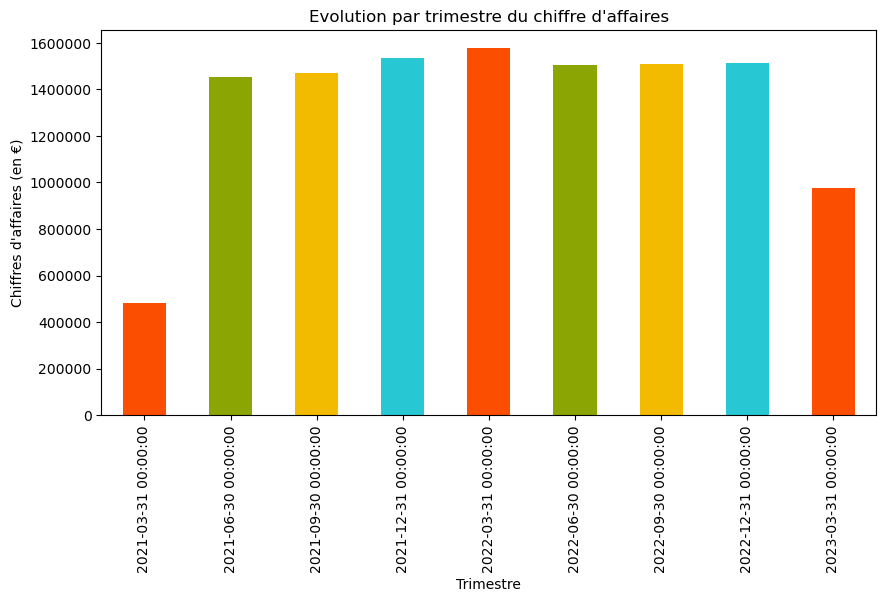

In [28]:
# Création d'une courbe
plt.figure(figsize = (10,5))
#ca_par_trimestre.plot(linestyle='-', color='#AA2E22')
#ca_par_trimestre.plot.bar(color=['#C63B61', '#3885AD', 'grey', '#793A4C'])
ca_par_trimestre.plot.bar(color=['#FC4E00', '#8BA503', '#F3BB00', '#27C7D4'])

plt.ticklabel_format(axis="y", style="plain")  # Ne pas utiliser la notation scientifique

plt.xlabel("Trimestre")
plt.ylabel("Chiffres d'affaires (en €)")
plt.title("Evolution par trimestre du chiffre d'affaires")
plt.ylim(0)

# Affichage du graphique
plt.show()

Le premier trimestre de 2023 est légèrement en baisse, par rapport au premier trimestre de 2022. Néanmoins, il manque les ventes de mars 2023, il faut donc faire une analyse par mois. 

<div style="border: 1px solid RGB(170,46,34);" >
<h3 style="margin: auto; padding: 20px; color: RGB(170,46,34); ">4.4 - Chiffres d'affaires mensuels</h3>
</div>

In [29]:
#Calcul des chiffres d'affaires par mois et par année
ca_par_mois_annee = df_final.groupby([df_final['annee'], df_final['mois']])['price'].sum()
print("Chiffres d'affaires mensuels :\n",ca_par_mois_annee, end="\n\n")

#Calcul du nombre de ventes par mois et par année
#ventes_par_mois_annee = df_final.groupby([df_final['annee'], df_final['mois']])['session_id'].count()
#print("Nombre de ventes mensuelles :\n",ventes_par_mois_annee)

Chiffres d'affaires mensuels :
 annee  mois
2021   3       482440.61
       4       476109.30
       5       492943.47
       6       484088.56
       7       482835.40
       8       482284.79
       9       507240.68
       10      494733.16
       11      516167.73
       12      525917.28
2022   1       525338.99
       2       535571.50
       3       515456.53
       4       492998.94
       5       517132.60
       6       496016.12
       7       510783.12
       8       506467.27
       9       494114.53
       10      507917.77
       11      496664.94
       12      510219.50
2023   1       517540.55
       2       456679.76
Name: price, dtype: float64



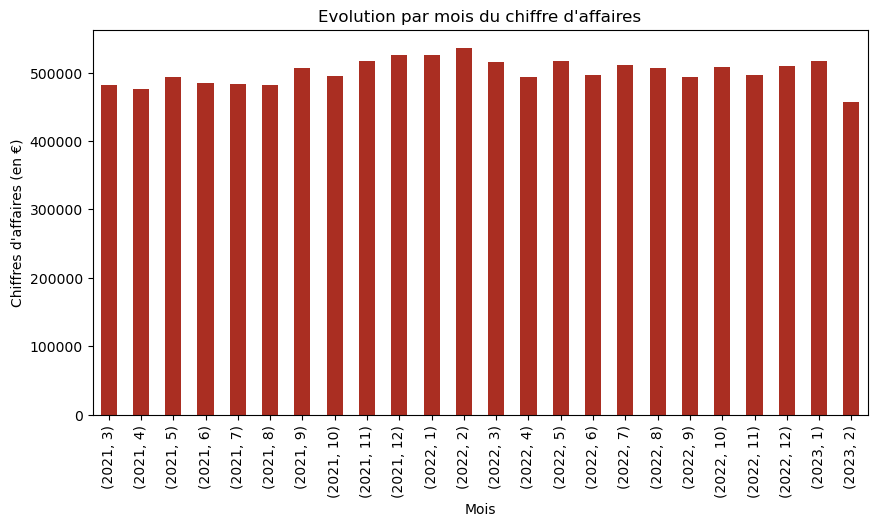

In [30]:
# Création d'une courbe
plt.figure(figsize = (10,5))
#ca_par_mois_annee.plot(linestyle='-', color='#AA2E22')
#ca_par_trimestre.plot.bar(color=['#C63B61', '#3885AD', 'grey', '#793A4C'])
ca_par_mois_annee.plot.bar(color=['#AA2E22'])

plt.ticklabel_format(axis="y", style="plain")  # Ne pas utiliser la notation scientifique

plt.xlabel("Mois")
plt.ylabel("Chiffres d'affaires (en €)")
plt.title("Evolution par mois du chiffre d'affaires")
plt.ylim(0)

# Affichage du graphique
plt.show()

<div style="border: 1px solid RGB(170,46,34);" >
<h3 style="margin: auto; padding: 20px; color: RGB(170,46,34); ">4.5 - Chiffres d'affaires journaliers et moyenne mobile</h3>
</div>

In [31]:
#Calcul des chiffres d'affaires journaliers
ca_par_jour = df_final.groupby([df_final['date_timestamp']])['price'].sum()

In [32]:
moyenne_mobile = ca_par_jour.rolling(30).mean()

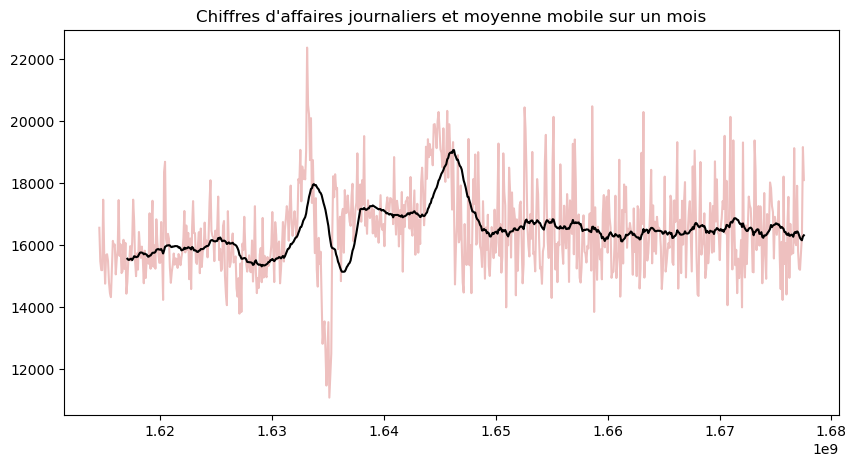

In [33]:
# On crée un graphique pour superposer la moyenne mobile à notre série temporelle
fig, ax = plt.subplots(figsize = (10,5))

# On trace la courbe de la série temporelle
ax.plot(ca_par_jour.index, ca_par_jour.values, color='#EEC0BF')

# On trace la courbe de la moyenne mobile
ax.plot(moyenne_mobile.index, moyenne_mobile.values, color="black")

# On ajoute un titre
plt.title("Chiffres d'affaires journaliers et moyenne mobile sur un mois")

# On affiche le graphique de Pareto
plt.show()

In [34]:
moyenne_mobile = ca_par_jour.rolling(90).mean()
#moyenne_mobile.head()

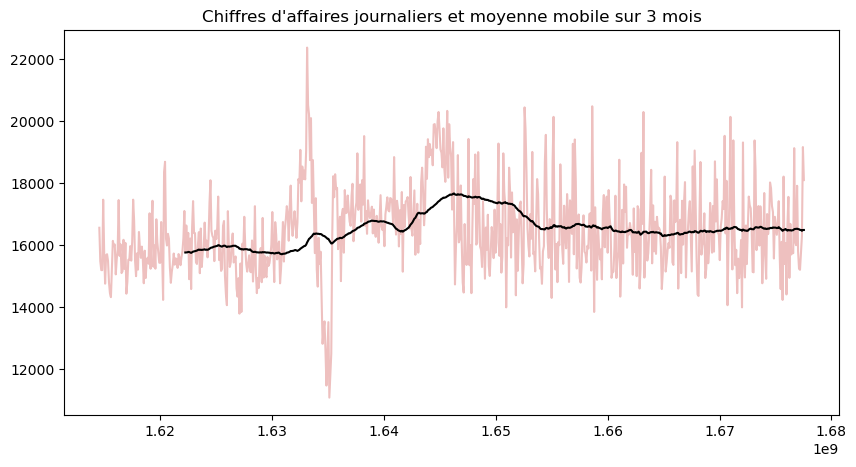

In [35]:
# On crée un graphique pour superposer la moyenne mobile à notre série temporelle
fig, ax = plt.subplots(figsize = (10,5))

# On trace la courbe de la série temporelle
ax.plot(ca_par_jour.index, ca_par_jour.values, color='#EEC0BF')

# On trace la courbe de la moyenne mobile
ax.plot(moyenne_mobile.index, moyenne_mobile.values, color="black")

# On ajoute un titre
plt.title("Chiffres d'affaires journaliers et moyenne mobile sur 3 mois")

# On affiche le graphique de Pareto
plt.show()

In [36]:
moyenne_mobile = ca_par_mois_annee.rolling(3).mean()
print(moyenne_mobile)

annee  mois
2021   3                 NaN
       4                 NaN
       5       483831.126667
       6       484380.443333
       7       486622.476667
       8       483069.583333
       9       490786.956667
       10      494752.876667
       11      506047.190000
       12      512272.723333
2022   1       522474.666667
       2       528942.590000
       3       525455.673333
       4       514675.656667
       5       508529.356667
       6       502049.220000
       7       507977.280000
       8       504422.170000
       9       503788.306667
       10      502833.190000
       11      499565.746667
       12      504934.070000
2023   1       508141.663333
       2       494813.270000
Name: price, dtype: float64


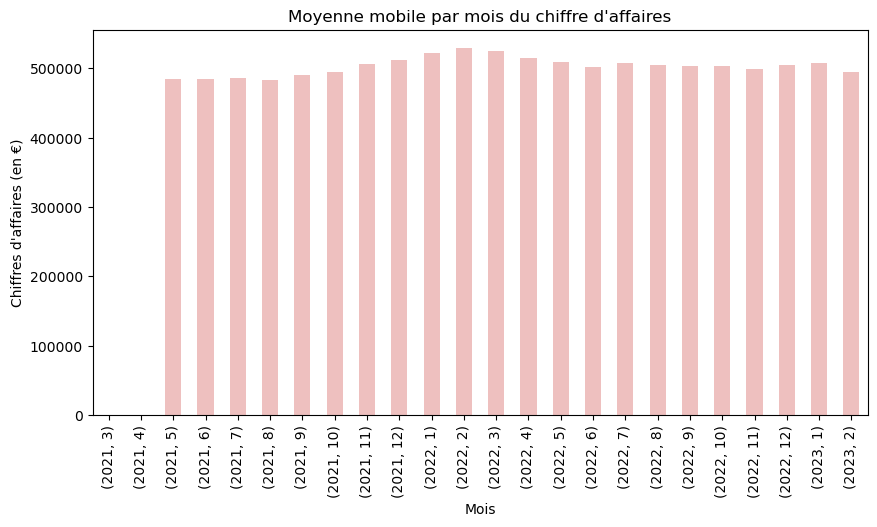

In [37]:
# Création d'une courbe
plt.figure(figsize = (10,5))
#ca_par_mois_annee.plot(linestyle='-', color='#AA2E22')
#ca_par_trimestre.plot.bar(color=['#C63B61', '#3885AD', 'grey', '#793A4C'])
moyenne_mobile.plot.bar(color=['#EEC0BF'])

plt.ticklabel_format(axis="y", style="plain")  # Ne pas utiliser la notation scientifique

plt.xlabel("Mois")
plt.ylabel("Chiffres d'affaires (en €)")
plt.title("Moyenne mobile par mois du chiffre d'affaires")
plt.ylim(0)

# Affichage du graphique
plt.show()

On constate une baisse du chiffre d'affaires au mois de février 2023 par rapport au mois de février 2022 qui était le meilleur mois de l'année 2022.

<div style="border: 1px solid RGB(170,46,34);" >
<h3 style="margin: auto; padding: 20px; color: RGB(170,46,34); ">4.6 - Saisonnalité du chiffre d'affaires</h3>
</div>

In [38]:
ca_journalier_2 = df_final.groupby([df_final['annee'], df_final['mois'],  df_final['jour']])['price'].sum()

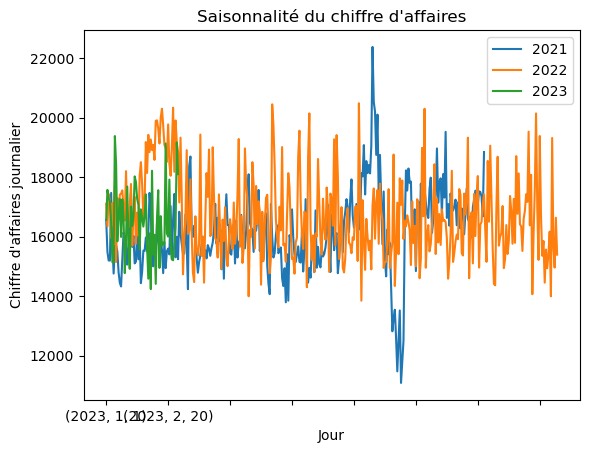

In [39]:
# Créer une figure et un axe
fig, ax = plt.subplots()

# Parcourir chaque année et créer une courbe séparée pour chaque année
for annee, data in ca_journalier_2.groupby(level='annee'):
    data.plot(ax=ax, label=annee)

# Ajouter une légende
ax.legend()

# Définir les étiquettes des axes
ax.set_xlabel('Jour')
ax.set_ylabel('Chiffre d\'affaires journalier')

# On ajoute un titre
plt.title("Saisonnalité du chiffre d'affaires")


# Afficher le graphique
plt.show()

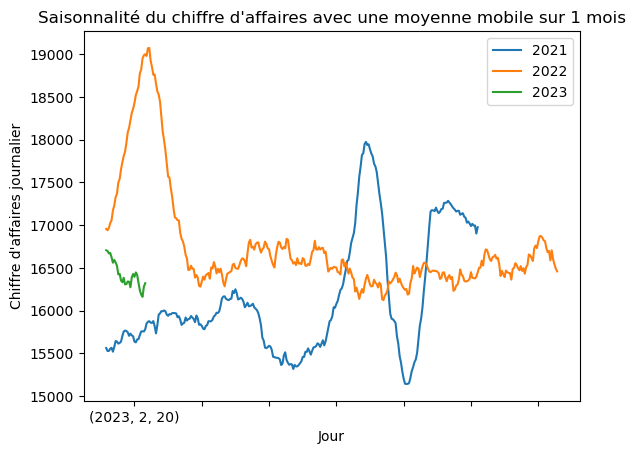

In [40]:
# Créer une figure et un axe
fig, ax = plt.subplots()

# Parcourir chaque année et créer une courbe séparée pour chaque année
for annee, data in ca_journalier_2.groupby(level='annee'):
    data.rolling(30).mean().plot(ax=ax, label=annee)

# Ajouter une légende
ax.legend()

# Définir les étiquettes des axes
ax.set_xlabel('Jour')
ax.set_ylabel('Chiffre d\'affaires journalier')

# On ajoute un titre
plt.title("Saisonnalité du chiffre d'affaires avec une moyenne mobile sur 1 mois")

# Afficher le graphique
plt.show()

<div style="border: 1px solid RGB(170,46,34);" >
<h3 style="margin: auto; padding: 20px; color: RGB(170,46,34); ">4.7 - Projection du chiffre d'affaires sur l'année 2023</h3>
</div>

<div style="background-color: RGB(170,46,34);" >
<h2 style="margin: auto; padding: 20px; color: white;">Partie 5 - Zoom sur les références</h2>
</div>

<div style="border: 1px solid RGB(170,46,34);" >
<h3 style="margin: auto; padding: 20px; color: RGB(170,46,34); ">5.1 - Etude de la variable de prix</h3>
</div>

In [41]:
df_final['price'].describe()

count    687534.000000
mean         17.493918
std          18.238337
min           0.620000
25%           8.990000
50%          13.990000
75%          19.080000
max         300.000000
Name: price, dtype: float64

<div style="border: 1px solid RGB(170,46,34);" >
<h3 style="margin: auto; padding: 20px; color: RGB(170,46,34); ">5.2 - Répartition du nombre de livres par catégorie</h3>
</div>

In [42]:
#Création d'un dataframe avec les chiffres d'affaires par catégorie
df_categories = df_final[['categ', 'annee', 'mois', 'price']]
df_categories = pd.pivot_table(df_categories, index=['annee', 'mois'], columns=['categ'], aggfunc=['sum']).reset_index()
df_categories.columns = ['annee', 'mois', 'CA_categorie_0', 'CA_categorie_1', 'CA_categorie_2']

In [43]:
colors=['#EEC0BF', '#AA2E22', '#767575']

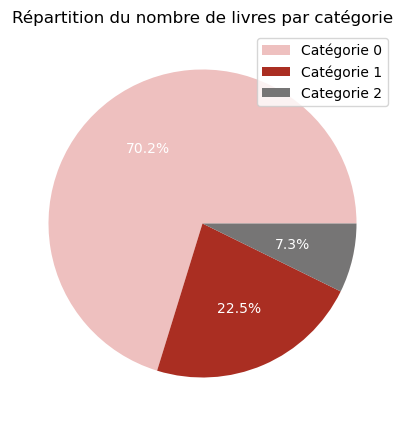

In [44]:
#Valeurs du nombre de livres par catégorie pour le graphique en secteur
nb_livres_0 = df_produits['categ'].value_counts()[0]
nb_livres_1 = df_produits['categ'].value_counts()[1]
nb_livres_2 = df_produits['categ'].value_counts()[2]
nb_livres = nb_livres_0 + nb_livres_1 + nb_livres_2
nombre_livre_categorie = [nb_livres_0*100/nb_livres, nb_livres_1*100/nb_livres, nb_livres_2*100/nb_livres]

#Création du graphique en secteur
plt.figure(figsize = (16,5))
plt.pie(nombre_livre_categorie, colors=colors, autopct='%1.1f%%', textprops={'color': 'white'})
plt.title("Répartition du nombre de livres par catégorie")
plt.legend(["Catégorie 0", "Catégorie 1", "Categorie 2"], loc='upper right')
plt.show()

<div style="border: 1px solid RGB(170,46,34);" >
<h3 style="margin: auto; padding: 20px; color: RGB(170,46,34); ">5.3 - Chiffres d'affaires mensuel par catégorie</h3>
</div>

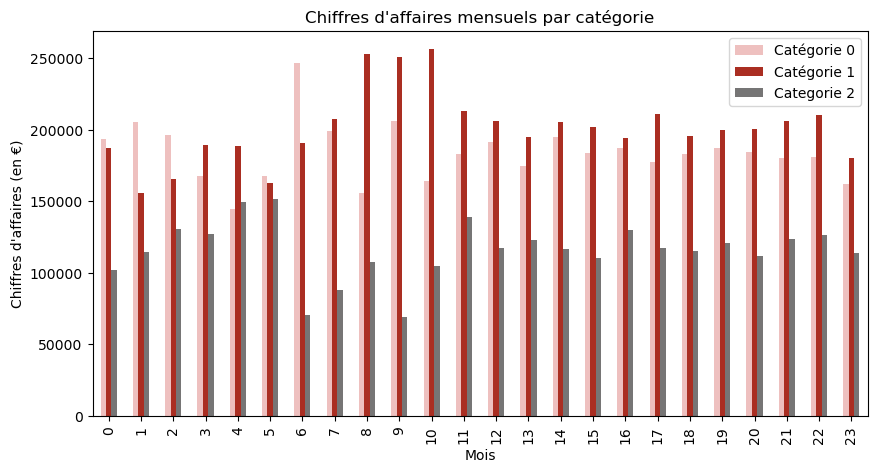

In [45]:
# Création du graphique en barres pour le chiffres d'affaires
#plt.bar(categories_df['CA_categorie_0', 'CA_categorie_1', 'CA_categorie_2'], color=colors)
df_categories[['CA_categorie_0', 'CA_categorie_1', 'CA_categorie_2']].plot.bar(color=colors, figsize = (10,5))

# Ajout des étiquettes et du titre
#plt.figure(figsize = (10,5))
plt.xlabel("Mois")
plt.ylabel("Chiffres d'affaires (en €)")
plt.title("Chiffres d'affaires mensuels par catégorie")
plt.legend(["Catégorie 0", "Catégorie 1", "Categorie 2"])

# Affichage du graphique
plt.show()

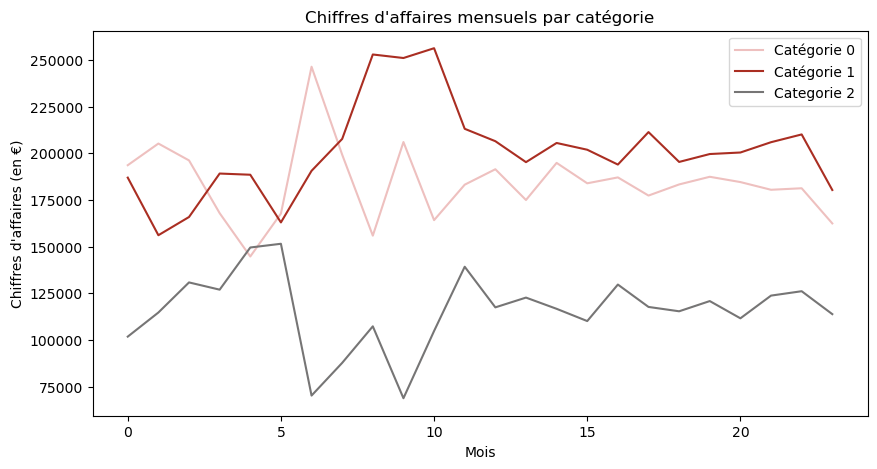

In [46]:
# Création du graphique en barres pour le chiffres d'affaires
#plt.bar(categories_df['CA_categorie_0', 'CA_categorie_1', 'CA_categorie_2'], color=colors)
df_categories[['CA_categorie_0', 'CA_categorie_1', 'CA_categorie_2']].plot(color=colors, figsize = (10,5))

# Ajout des étiquettes et du titre
#plt.figure(figsize = (10,5))
plt.xlabel("Mois")
plt.ylabel("Chiffres d'affaires (en €)")
plt.title("Chiffres d'affaires mensuels par catégorie")
plt.legend(["Catégorie 0", "Catégorie 1", "Categorie 2"])

# Affichage du graphique
plt.show()

<Figure size 1600x1000 with 0 Axes>

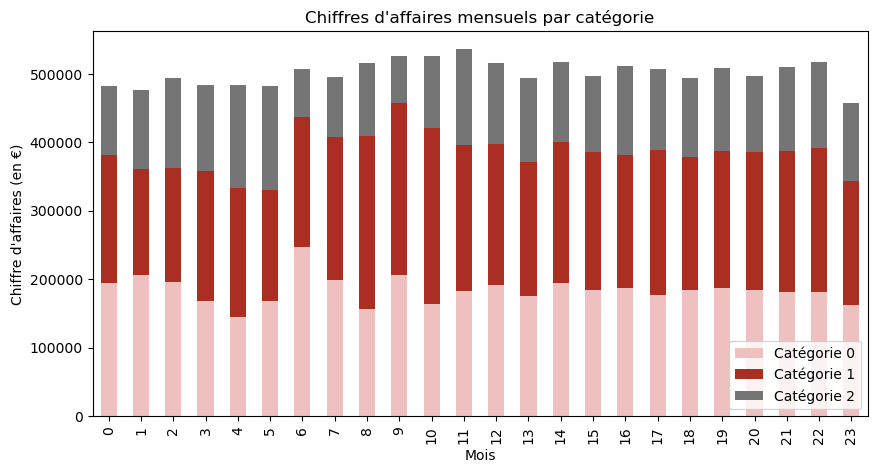

In [47]:
plt.figure(figsize = (16,10))

# Afficher le diagramme à barres empilées
df_categories[['CA_categorie_0', 'CA_categorie_1', 'CA_categorie_2']].plot.bar(color=colors, stacked=True, figsize = (10,5))

# Ajouter des labels et un titre
plt.xlabel('Mois')
plt.ylabel('Chiffre d\'affaires (en €)')
plt.title('Chiffres d\'affaires mensuels par catégorie')

# Afficher la légende
plt.legend(['Catégorie 0', 'Catégorie 1', 'Catégorie 2'], loc="lower right")

# Afficher le diagramme
plt.show()

<div style="border: 1px solid RGB(170,46,34);" >
<h3 style="margin: auto; padding: 20px; color: RGB(170,46,34); ">5.4 - Analyses sur les références</h3>
</div>

In [48]:
#Création d'un dataframe avec le nombre de ventes par référence
ventes_par_reference = df_final[['id_prod', 'categ', 'session_id']].groupby(['id_prod', 'categ']).count().reset_index()
ventes_par_reference.columns = ['id_prod', 'categorie', 'nombre_de_ventes']

#Merge du dataframe avec le nombre de ventes par référence pour ajouter le prix unitaire d'un livre et calculer le CA
vente_prix_reference = df_produits.merge(ventes_par_reference, on="id_prod", how="outer", indicator=True)
vente_prix_reference.drop(['_merge', 'categorie'], axis=1, inplace=True)
vente_prix_reference['CA_produit'] = vente_prix_reference['price'] * vente_prix_reference['nombre_de_ventes']
vente_prix_reference.head()

,id_prod,price,categ,nombre_de_ventes,CA_produit
0,0_1421,19.99,0,1151.0,23008.49
1,0_1368,5.13,0,919.0,4714.47
2,0_731,17.99,0,16.0,287.84
3,1_587,4.99,1,121.0,603.79
4,0_1507,3.99,0,706.0,2816.94


In [49]:
vente_prix_reference.nlargest(10, 'CA_produit')

,id_prod,price,categ,nombre_de_ventes,CA_produit
1314,2_159,145.99,2,650.0,94893.50
2670,2_135,68.99,2,1005.0,69334.95
465,2_112,67.57,2,968.0,65407.76
2345,2_102,59.14,2,1027.0,60736.78
492,2_209,69.99,2,814.0,56971.86
1746,1_395,28.99,1,1953.0,56617.47
2646,1_369,23.99,1,2340.0,56136.60
2460,2_110,62.25,2,865.0,53846.25
3235,1_383,28.99,1,1857.0,53834.43
2217,1_414,23.83,1,2246.0,53522.18


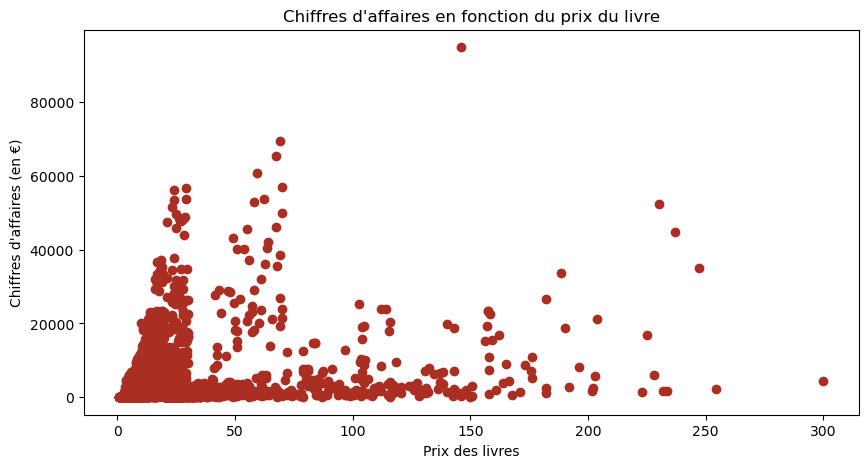

In [50]:
plt.figure(figsize = (10,5))

# On créé le scatter plot avec les données non outliers en noir
plt.scatter(vente_prix_reference['price'], vente_prix_reference['CA_produit'], color="#AA2E22")

# On personnalise le scatter plot
plt.xlabel("Prix des livres")
plt.ylabel("Chiffres d'affaires (en €)")
plt.title("Chiffres d'affaires en fonction du prix du livre")

# On affiche le scatter plot
plt.show()

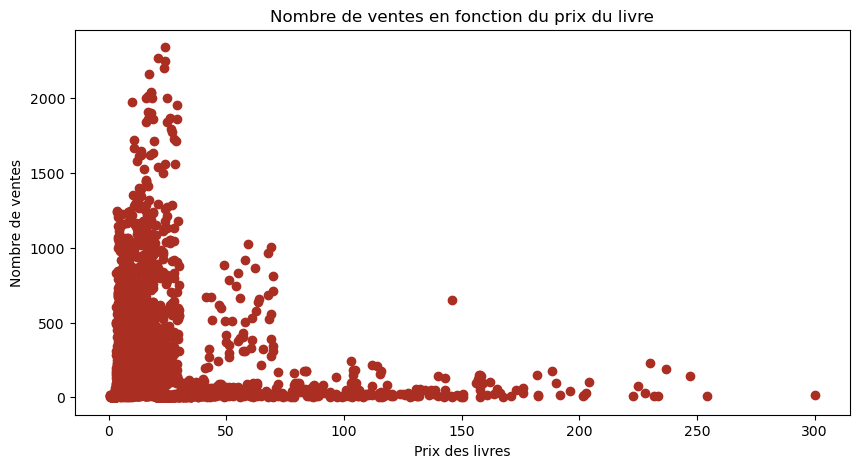

In [51]:
plt.figure(figsize = (10,5))

# On créé le scatter plot avec les données non outliers en noir
plt.scatter(vente_prix_reference['price'], vente_prix_reference['nombre_de_ventes'], color="#AA2E22")

# On personnalise le scatter plot
plt.xlabel("Prix des livres")
plt.ylabel("Nombre de ventes")
plt.title("Nombre de ventes en fonction du prix du livre")

# On affiche le scatter plot
plt.show()

<div style="border: 1px solid RGB(170,46,34);" >
<h3 style="margin: auto; padding: 20px; color: RGB(170,46,34); ">5.5 - Tops des références</h3>
</div>

In [52]:
#Chiffres d'affaires des références les plus vendues
vente_prix_reference.nlargest(10, 'CA_produit')

,id_prod,price,categ,nombre_de_ventes,CA_produit
1314,2_159,145.99,2,650.0,94893.50
2670,2_135,68.99,2,1005.0,69334.95
465,2_112,67.57,2,968.0,65407.76
2345,2_102,59.14,2,1027.0,60736.78
492,2_209,69.99,2,814.0,56971.86
1746,1_395,28.99,1,1953.0,56617.47
2646,1_369,23.99,1,2340.0,56136.60
2460,2_110,62.25,2,865.0,53846.25
3235,1_383,28.99,1,1857.0,53834.43
2217,1_414,23.83,1,2246.0,53522.18


Les 10 livres qui ont le plus gros chiffre d'affaires sont des livres appartenant à la catégorie 1 et 2. 

Les 5 livres ayant le plus gros chiffre d'affaires sont des livres de la catégorie 2.

In [53]:
#Références les plus vendues
vente_prix_reference.nlargest(10, 'nombre_de_ventes')

,id_prod,price,categ,nombre_de_ventes,CA_produit
2646,1_369,23.99,1,2340.0,56136.60
2199,1_417,20.99,1,2269.0,47626.31
2217,1_414,23.83,1,2246.0,53522.18
2886,1_498,23.37,1,2202.0,51460.74
1040,1_425,16.99,1,2163.0,36749.37
740,1_403,17.99,1,2040.0,36699.60
3240,1_413,17.99,1,2036.0,36627.64
2587,1_412,16.65,1,2014.0,33533.10
1549,1_406,24.81,1,2003.0,49694.43
1325,1_407,15.99,1,2001.0,31995.99


Les 10 livres qui se sont le plus vendus appartiennent à la catégorie 1 avec plus de 2000 ventes pour chaque référence.

<div style="border: 1px solid RGB(170,46,34);" >
<h3 style="margin: auto; padding: 20px; color: RGB(170,46,34); ">5.6 - Flops des références</h3>
</div>

In [54]:
#Chiffres d'affaires des références les moins vendues
vente_prix_reference.nsmallest(10, 'CA_produit')

,id_prod,price,categ,nombre_de_ventes,CA_produit
1910,0_1539,0.99,0,1.0,0.99
2831,0_1284,1.38,0,1.0,1.38
2531,0_1653,0.99,0,2.0,1.98
1740,0_807,1.99,0,1.0,1.99
2812,0_1601,1.99,0,1.0,1.99
3000,0_541,1.99,0,1.0,1.99
1451,0_1728,2.27,0,1.0,2.27
2715,0_1498,2.48,0,1.0,2.48
1811,0_898,1.27,0,2.0,2.54
940,0_1840,1.28,0,2.0,2.56


Les 10 livres qui ont le plus petit chiffre d'affaires sont des livres appartenant à la catégorie 0.

In [55]:
flop = ventes_par_reference[ventes_par_reference['nombre_de_ventes'] == 1]
print(flop.shape[0], "références")
print(flop)

18 références
     id_prod  categorie  nombre_de_ventes
166   0_1151          0                 1
313   0_1284          0                 1
417   0_1379          0                 1
549   0_1498          0                 1
595   0_1539          0                 1
665   0_1601          0                 1
698   0_1633          0                 1
752   0_1683          0                 1
802   0_1728          0                 1
1327  0_2201          0                 1
1784   0_541          0                 1
1792   0_549          0                 1
2079   0_807          0                 1
2108   0_833          0                 1
2166   0_886          0                 1
3175    2_23          2                 1
3247    2_81          2                 1
3263    2_98          2                 1


Les 18 livres les moins vendus appartiennent principalement à la catégorie 0.

<div style="border: 1px solid RGB(170,46,34);" >
<h3 style="margin: auto; padding: 20px; color: RGB(170,46,34); ">5.7 - Répartition des prix par catégorie</h3>
</div>

In [56]:
#Sélection des prix pour chaque catégorie
prix_categ_0 = df_final.loc[df_final['categ'] == 0, 'price']
prix_categ_1 = df_final.loc[df_final['categ'] == 1, 'price']
prix_categ_2 = df_final.loc[df_final['categ'] == 2, 'price']

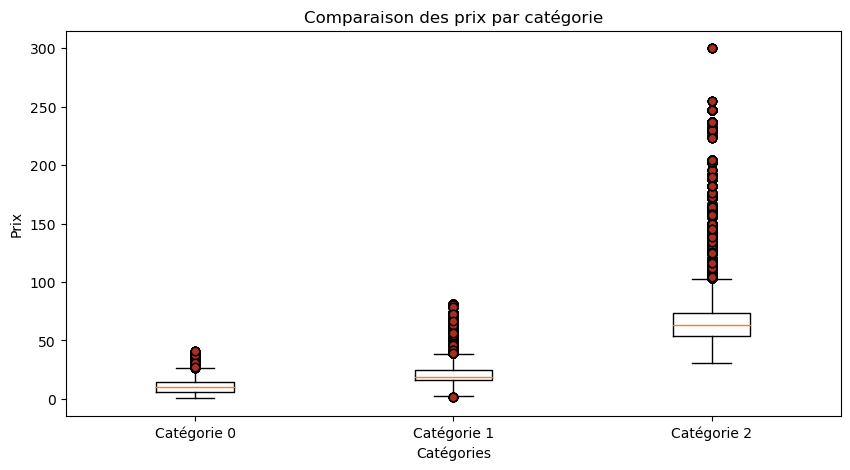

In [57]:
#Création d'une liste des prix par catégorie
prix_par_categ = [prix_categ_0, prix_categ_1, prix_categ_2]

plt.figure(figsize = (10,5))

# Création du graphique des boxplots
plt.boxplot(prix_par_categ, labels=['Catégorie 0', 'Catégorie 1', 'Catégorie 2'], showfliers=True, flierprops={'markerfacecolor': '#AA2E22', 'marker': 'o'})

# Ajout des labels et d'un titre
plt.xlabel('Catégories')
plt.ylabel('Prix')
plt.title('Comparaison des prix par catégorie')

# Affichage du graphique
plt.show()

In [58]:
#Calcul des différents indicateurs de prix pour la catégorie 0
print("Pour la catégorie 0 :", end="\n")
print("Le prix minimum est de :", "{:.2f}".format(prix_categ_0.min()), "€", end="\n")
print("Le prix maximum est de :", "{:.2f}".format(prix_categ_0.max()), "€", end="\n")
print("Le prix moyen est de :", "{:.2f}".format(prix_categ_0.mean()), "€", end="\n")
print("Le prix median est de :", "{:.2f}".format(prix_categ_0.median()), "€", end="\n\n")

#Calcul des différents indicateurs de prix pour la catégorie 1
print("Pour la catégorie 1 :", end="\n")
print("Le prix minimum est de :", "{:.2f}".format(prix_categ_1.min()), "€", end="\n")
print("Le prix maximum est de :", "{:.2f}".format(prix_categ_1.max()), "€", end="\n")
print("Le prix moyen est de :", "{:.2f}".format(prix_categ_1.mean()), "€", end="\n")
print("Le prix median est de :", "{:.2f}".format(prix_categ_1.median()), "€", end="\n\n")

#Calcul des différents indicateurs de prix pour la catégorie 2
print("Pour la catégorie 2 :", end="\n")
print("Le prix minimum est de :", "{:.2f}".format(prix_categ_2.min()), "€", end="\n")
print("Le prix maximum est de :", "{:.2f}".format(prix_categ_2.max()), "€", end="\n")
print("Le prix moyen est de :", "{:.2f}".format(prix_categ_2.mean()), "€", end="\n")
print("Le prix median est de :", "{:.2f}".format(prix_categ_2.median()), "€")

Pour la catégorie 0 :
Le prix minimum est de : 0.62 €
Le prix maximum est de : 40.99 €
Le prix moyen est de : 10.64 €
Le prix median est de : 9.99 €

Pour la catégorie 1 :
Le prix minimum est de : 2.00 €
Le prix maximum est de : 80.99 €
Le prix moyen est de : 20.49 €
Le prix median est de : 19.08 €

Pour la catégorie 2 :
Le prix minimum est de : 30.99 €
Le prix maximum est de : 300.00 €
Le prix moyen est de : 76.21 €
Le prix median est de : 62.83 €


<div style="border: 1px solid RGB(170,46,34);" >
<h3 style="margin: auto; padding: 20px; color: RGB(170,46,34); ">5.8 - Courbe de Pareto</h3>
</div>

In [59]:
# On calcule le nombre de ventes par livre
nombre_ventes = df_final['id_prod'].value_counts()

# On calculer le pourcentage cumulé des ventes
pourcentage_cumule_ventes = nombre_ventes.cumsum() / nombre_ventes.sum() * 100

# On crée un dataframe avec les données des ventes par livre et le pourcentage cumulé
pareto = pd.DataFrame({'ventes': nombre_ventes, 'pourcentage_cumule': pourcentage_cumule_ventes})

# On trie les données par ordre décroissant des ventes
pareto = pareto.sort_values('ventes', ascending=False)

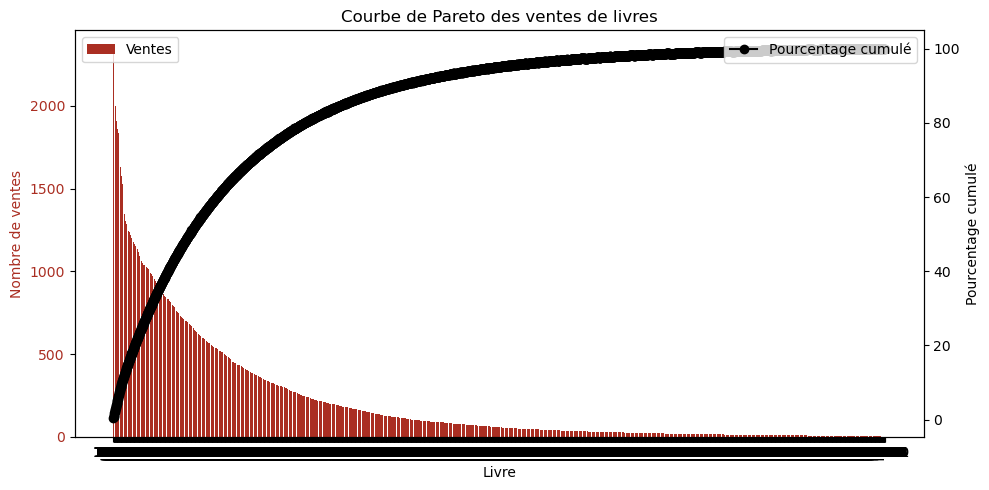

In [60]:
# On crée un graphique de courbe de Pareto
fig, ax1 = plt.subplots(figsize = (10,5))

# On trace la courbe des ventes
ax1.bar(pareto.index, pareto['ventes'], color='#AA2E22')
ax1.set_xlabel('Livre')
ax1.set_ylabel('Nombre de ventes', color='#AA2E22')
ax1.tick_params(axis='y', labelcolor='#AA2E22')

# On crée un axe secondaire pour le pourcentage cumulé
ax2 = ax1.twinx()
ax2.plot(pareto.index, pareto['pourcentage_cumule'], color='#000', marker='o')
ax2.set_ylabel('Pourcentage cumulé', color='#000')
ax2.tick_params(axis='y', labelcolor='#000')

# On ajoute une légende
ax1.legend(['Ventes'], loc='upper left')
ax2.legend(['Pourcentage cumulé'], loc='upper right')

# On ajoute un titre
plt.title('Courbe de Pareto des ventes de livres')

# On ajuste l'espacement entre les sous-graphiques
fig.tight_layout()

# On affiche le graphique de Pareto
plt.show()

<div style="background-color: RGB(170,46,34);" >
<h2 style="margin: auto; padding: 20px; color: white;">Partie 6 - Informations sur les profils des clients</h2>
</div>

<div style="border: 1px solid RGB(170,46,34);" >
<h3 style="margin: auto; padding: 20px; color: RGB(170,46,34); ">6.1 - Répartition par âge</h3>
</div>

In [61]:
df_clients['age'].describe()

count    8621.000000
mean       44.724394
std        16.917958
min        19.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        94.000000
Name: age, dtype: float64

In [62]:
nb_clients = df_clients['age'].value_counts()
df_client_age = nb_clients.reset_index()
df_client_age.columns = ['age', 'nombre_clients']
df_client_age

,age,nombre_clients
0,19,440
1,44,215
2,35,207
3,37,203
4,45,199
...,...,...
71,90,8
72,91,6
73,92,4
74,93,4


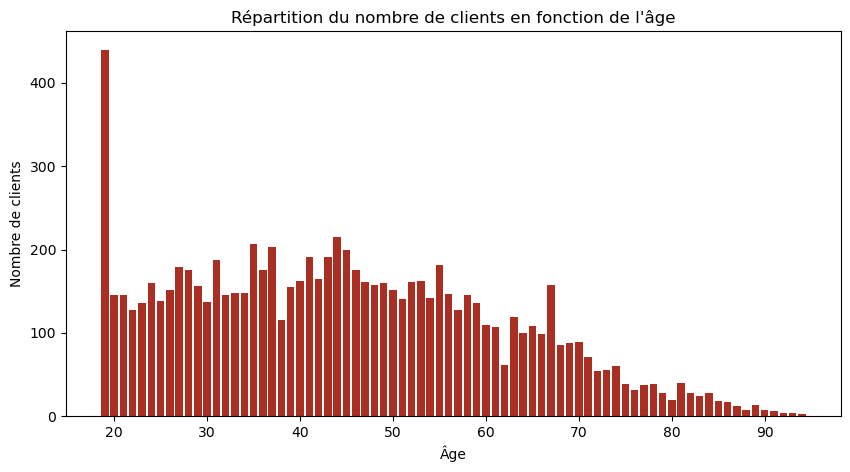

In [63]:
# Création d'un graphique
plt.figure(figsize = (10,5))

plt.bar(df_client_age['age'], df_client_age['nombre_clients'],color='#AA2E22')

plt.xlabel("Âge")
plt.ylabel("Nombre de clients")
plt.title("Répartition du nombre de clients en fonction de l'âge")
plt.ylim(0)

# Affichage du graphique
plt.show()

In [64]:
# On effectue le test de Shapiro-Wilk
stat, p_value = st.shapiro(df_clients['age'])

# On compare la valeur p avec le seuil de signification (par exemple, 0.05)
alpha = 0.05
if p_value > alpha:
    print("La distribution des âges suit une loi normale.")
else:
    print("La distribution des âges ne suit pas une loi normale.")

La distribution des âges ne suit pas une loi normale.


C:\Users\steph\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Le test de Shapiro-Wilk étant généralement plus fiable pour des échantillons de taille modérée (d'où le warning), on effecture un test alternatif, à savoir un test de Kolmogorov-Smirnov.

In [65]:
# Effectuer le test de Kolmogorov-Smirnov
stat, p_value = st.kstest(df_clients['age'], 'norm')

# Comparer la valeur p avec le seuil de signification (par exemple, 0.05)
alpha = 0.05
if p_value > alpha:
    print("La distribution des âges suit une loi normale.")
else:
    print("La distribution des âges ne suit pas une loi normale.")

La distribution des âges ne suit pas une loi normale.


<div style="border: 1px solid RGB(170,46,34);" >
<h3 style="margin: auto; padding: 20px; color: RGB(170,46,34); ">6.2 - Répartition par tranche d'âge</h3>
</div>

In [66]:
#df_clients
df_clients.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8621 entries, 0 to 8620
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
 3   age        8621 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 269.5+ KB


In [67]:
print("L'âge minimum des clients est de", df_clients['age'].min(), "ans", end="\n")
print("L'âge maximum des clients est de", df_clients['age'].max(), "ans", end="\n")
print("L'âge moyen des clients est de", "{:.0f}".format(df_clients['age'].mean()), "ans")

L'âge minimum des clients est de 19 ans
L'âge maximum des clients est de 94 ans
L'âge moyen des clients est de 45 ans


In [68]:
# On définit les tranches d'âge
age_bins = [18, 25, 35, 45, 55, 65, 75, 85, 120]
age_labels = ['18-24 ans', '25-34 ans', '35-44 ans', '45-54 ans', '55-64 ans', '65-74 ans', '75-84 ans', '85 ans et plus']

df_clients_tmp = df_clients

# On créé une nouvelle colonne "tranche_age" dans le dataframe
df_clients_tmp['tranche_age'] = pd.cut(df_clients_tmp['age'], bins=age_bins, labels=age_labels, right=False)

#On compte le nombre de clients par tranche d'âge
df_repartition_age_clients = df_clients_tmp.groupby('tranche_age')['client_id'].count().reset_index()

# On renomme les colonnes
df_repartition_age_clients.columns = ['tranche_age', 'nombre']

df_repartition_age_clients['pourcentage'] = df_repartition_age_clients['nombre']*100/df_clients.shape[0]

print(df_repartition_age_clients)

      tranche_age  nombre  pourcentage
0       18-24 ans    1155    13.397518
1       25-34 ans    1566    18.164946
2       35-44 ans    1780    20.647257
3       45-54 ans    1610    18.675328
4       55-64 ans    1234    14.313885
5       65-74 ans     868    10.068438
6       75-84 ans     315     3.653868
7  85 ans et plus      93     1.078761


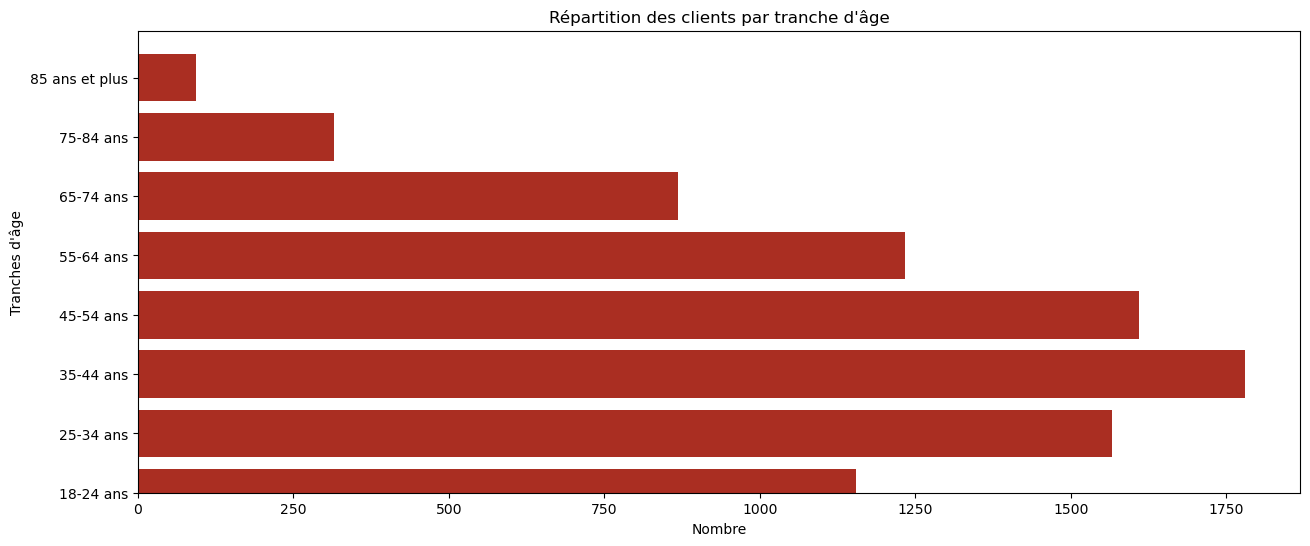

In [69]:
# Création d'un graphique en barre horizontal
plt.figure(figsize = (15,6))
plt.barh(df_repartition_age_clients['tranche_age'], df_repartition_age_clients['nombre'], color='#AA2E22')


plt.xlabel("Nombre")
plt.ylabel("Tranches d'âge")
plt.title("Répartition des clients par tranche d'âge")
plt.ylim(0)

# Affichage du graphique
plt.show()

La tranche d'âge de clients en plus grand nombre est la tranche d'âge des 35-44ans. On constate aussi qu'une majorité de clients a entre 25 et 54ans.

<div style="border: 1px solid RGB(170,46,34);" >
<h3 style="margin: auto; padding: 20px; color: RGB(170,46,34); ">6.2 - Répartition par sexe</h3>
</div>

In [70]:
df_sexe_age = df_clients[['sex', 'age']]
df_sexe_age

,sex,age
0,f,56
1,f,48
2,f,39
3,f,61
4,m,80
...,...,...
8616,m,67
8617,f,53
8618,m,49
8619,f,55


In [71]:
femme = df_sexe_age[df_sexe_age["sex"]=="f"]["age"]
homme = df_sexe_age[df_sexe_age["sex"]=="m"]["age"]

On teste tout d’abord l’égalité des variances à l’aide de la commande :

In [72]:
bartlett(femme,homme)

BartlettResult(statistic=2.156182827053712, pvalue=0.14199705593930773)

La p-valeur valant 0.14, on ne rejette donc pas l’égalité des variances au niveau de test 5%.

On teste ensuite l’égalité des moyennes à l’aide de la commande :

In [73]:
st.ttest_ind(femme, homme, equal_var=True)

Ttest_indResult(statistic=1.6357181605678486, pvalue=0.10193510077662274)

Les résultats du test suggèrent qu'il n'y a pas de différence statistiquement significative entre les âges moyens des femmes et des hommes dans notre échantillon. Cela signifie que, d'après les données que nous avons analysées, il n'y a pas suffisamment de preuves pour affirmer que les âges moyens des femmes sont significativement différents de ceux des hommes.

In [74]:
#On compte le nombre de clients par sexe
df_repartition_sexe_clients = df_clients_tmp.groupby('sex')['client_id'].count().reset_index()

# On renomme les colonnes
df_repartition_sexe_clients.columns = ['sexe', 'nombre']

df_repartition_sexe_clients['pourcentage'] = df_repartition_sexe_clients['nombre']*100/df_clients.shape[0]

print(df_repartition_sexe_clients)

  sexe  nombre  pourcentage
0    f    4490    52.082125
1    m    4131    47.917875


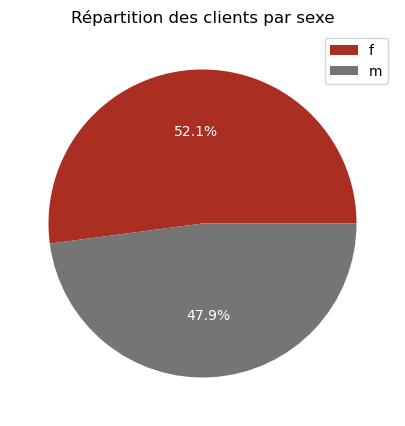

In [75]:
#Création d'un graphique en secteur
plt.figure(figsize = (10,5))
plt.pie(df_repartition_sexe_clients['pourcentage'], autopct='%1.1f%%', textprops={'color': 'white'}, colors=['#AA2E22', '#767575'])
plt.title("Répartition des clients par sexe")
plt.legend(df_repartition_sexe_clients['sexe'], loc="best")

#plt.show()

<div style="background-color: RGB(170,46,34);" >
<h2 style="margin: auto; padding: 20px; color: white;">Partie 7 - Répartition du chiffre d'affaires</h2>
</div>

<div style="border: 1px solid RGB(170,46,34);" >
<h3 style="margin: auto; padding: 20px; color: RGB(170,46,34); ">7.1 - Répartition du chiffre d'affaires par catégorie</h3>
</div>

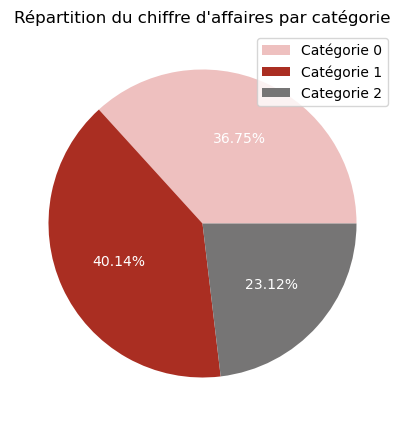

In [76]:
ca_categ_0 = df_categories['CA_categorie_0'].sum()
ca_categ_1 = df_categories['CA_categorie_1'].sum()
ca_categ_2 = df_categories['CA_categorie_2'].sum()

ca_categ = ca_categ_0 + ca_categ_1 + ca_categ_2

ca_livre_categorie = [ca_categ_0*100/ca_categ, ca_categ_1*100/ca_categ, ca_categ_2*100/ca_categ]

#Création du graphique en secteur
plt.figure(figsize = (10,5))
plt.pie(ca_livre_categorie, colors=colors, autopct='%1.2f%%', textprops={'color': 'white'})
plt.title("Répartition du chiffre d'affaires par catégorie")
plt.legend(["Catégorie 0", "Catégorie 1", "Categorie 2"])
plt.show()

In [77]:
print("Total du chiffre d'affaires par catégorie", end="\n")
print("Catégorie 0 :", "{:.2f}".format(ca_categ_0), "€ soit", "{:.2f}".format(ca_categ_0*100/ca_categ), "%", end="\n")
print("Catégorie 1 :", "{:.2f}".format(ca_categ_1), "€ soit", "{:.2f}".format(ca_categ_1*100/ca_categ), "%", end="\n")
print("Catégorie 2 :", "{:.2f}".format(ca_categ_2), "€ soit", "{:.2f}".format(ca_categ_2*100/ca_categ), "%", end="\n")

Total du chiffre d'affaires par catégorie
Catégorie 0 : 4419730.97 € soit 36.75 %
Catégorie 1 : 4827657.11 € soit 40.14 %
Catégorie 2 : 2780275.02 € soit 23.12 %


<div style="border: 1px solid RGB(170,46,34);" >
<h3 style="margin: auto; padding: 20px; color: RGB(170,46,34); ">7.2 - Répartition du chiffre d'affaires par client</h3>
</div>

In [78]:
ca_par_client = df_final.groupby(df_final['client_id'])['price'].sum()
ca_par_client.head()

client_id
c_1        629.02
c_10      1353.60
c_100      254.85
c_1000    2291.88
c_1001    1823.85
Name: price, dtype: float64

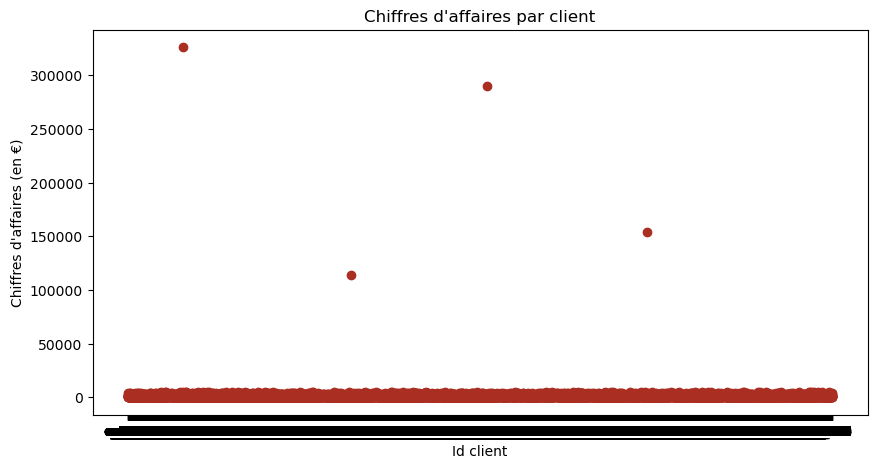

In [117]:
plt.figure(figsize = (10,5))

#Création du scatter plot avec les données non outliers en noir
plt.scatter(ca_par_client.index, ca_par_client.values, color="#AA2E22")

#Personnalisation du scatter plot
plt.xlabel("Id client")
plt.ylabel("Chiffres d'affaires (en €)")
plt.title("Chiffres d'affaires par client")

#Affichage du scatter plot
plt.show()

Il y a 4 clients qui ont un chiffre d'affaires beaucoup plus élevé que les autres.

In [80]:
ca_par_client.nlargest(4)

client_id
c_1609    326039.89
c_4958    290227.03
c_6714    153918.60
c_3454    114110.57
Name: price, dtype: float64

In [81]:
#Création d'un dataframe avec juste les informations du client c_1609
df_client_1609 = df_final.loc[df_final['client_id'] == 'c_1609', :]

#Comptage du nombre d'achats et du chiffre d'affaires par livre
client_1609 = df_client_1609.groupby(['id_prod']).agg({'session_id': 'count', 'price': 'sum'}).reset_index()

#Renommage des colonnes
client_1609.columns = ['id_prod', 'nombre_achats', 'ca']

#Affichage des 10 références les plus vendues
client_1609.nlargest(10, 'nombre_achats')

,id_prod,nombre_achats,ca
384,0_1438,95,884.45
311,0_1360,79,342.07
288,0_1334,78,1383.72
372,0_1424,75,630.75
360,0_1411,73,656.27
404,0_1461,73,875.27
406,0_1465,71,283.29
410,0_1470,70,1367.10
397,0_1453,69,551.31
302,0_1351,66,593.34


In [82]:
#Création d'un dataframe avec juste les informations du client c_4958
df_client_4958 = df_final.loc[df_final['client_id'] == 'c_4958', :]

#Comptage du nombre d'achats et du chiffre d'affaires par livre
client_4958 = df_client_4958.groupby(['id_prod']).agg({'session_id': 'count', 'price': 'sum'}).reset_index()

#Renommage des colonnes
client_4958.columns = ['id_prod', 'nombre_achats', 'ca']

#Affichage des 10 références les plus vendues
client_4958.nlargest(10, 'nombre_achats')

,id_prod,nombre_achats,ca
436,2_39,94,5451.06
434,2_37,93,4556.07
305,2_110,89,5540.25
303,2_109,85,4589.15
397,2_209,84,5879.16
306,2_112,83,5608.31
323,2_135,79,5450.21
298,2_102,77,4553.78
396,2_208,73,4005.51
302,2_108,70,4435.20


In [83]:
#Création d'un dataframe avec juste les informations du client c_6714
df_client_6714 = df_final.loc[df_final['client_id'] == 'c_6714', :]

#Comptage du nombre d'achats et du chiffre d'affaires par livre
client_6714 = df_client_6714.groupby(['id_prod']).agg({'session_id': 'count', 'price': 'sum'}).reset_index()

#Renommage des colonnes
client_6714.columns = ['id_prod', 'nombre_achats', 'ca']

#Affichage des 10 références les plus vendues
client_6714.nlargest(10, 'nombre_achats')

,id_prod,nombre_achats,ca
1139,1_498,48,1121.76
1092,1_403,42,755.58
1079,1_383,39,1130.61
1091,1_400,38,630.80
1082,1_389,37,924.63
1093,1_406,37,917.97
1099,1_414,37,881.71
1102,1_425,37,628.63
1132,1_480,37,705.96
1070,1_367,36,503.64


In [84]:
#Création d'un dataframe avec juste les informations du client c_3454
df_client_3454 = df_final.loc[df_final['client_id'] == 'c_3454', :]

#Comptage du nombre d'achats et du chiffre d'affaires par livre
client_3454 = df_client_3454.groupby(['id_prod']).agg({'session_id': 'count', 'price': 'sum'}).reset_index()

#Renommage des colonnes
client_3454.columns = ['id_prod', 'nombre_achats', 'ca']

#Affichage des 10 références les plus vendues
client_3454.nlargest(10, 'nombre_achats')

,id_prod,nombre_achats,ca
853,1_403,61,1097.39
847,1_395,52,1507.48
832,1_369,47,1127.53
859,1_414,46,1096.18
843,1_388,44,734.80
839,1_381,42,671.58
891,1_464,42,630.42
841,1_385,41,1065.59
846,1_392,41,742.51
862,1_425,41,696.59


<div style="border: 1px solid RGB(170,46,34);" >
<h3 style="margin: auto; padding: 20px; color: RGB(170,46,34); ">7.3 - Courbe de Lorenz</h3>
</div>

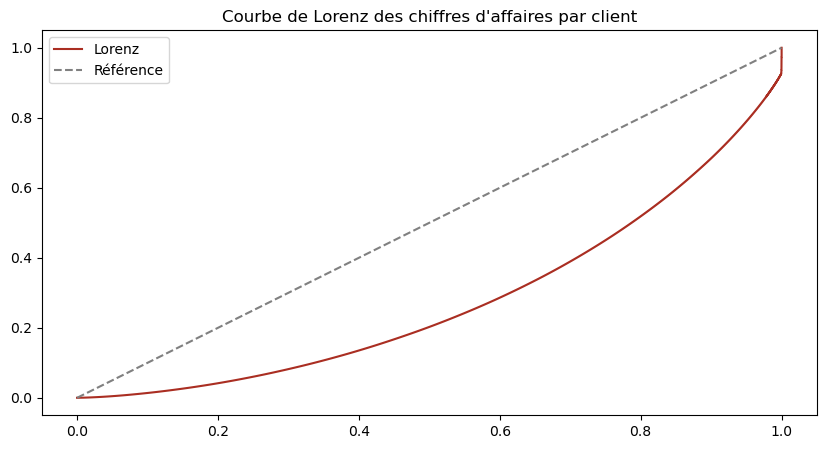

In [85]:
#Sélection des chiffres d'affaires
ca_client_lorenz = ca_par_client.values

n = len(ca_client_lorenz)

#Tri dans l'ordre croissant des valeurs de la variable,
#Calcul de la somme cumulée et normalisation en divisant par la somme des prix
lorenz = np.cumsum(np.sort(ca_client_lorenz)) / ca_client_lorenz.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.figure(figsize = (10,5))

#Courbe de Lorenz sur la variable des chiffres d'affaires
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post',color="#AA2E22", label="Lorenz")
plt.plot([0, 1], [0, 1], '--',  color="gray", label="Référence")

plt.title("Courbe de Lorenz des chiffres d'affaires par client")
plt.legend(loc="best")

plt.show()

In [86]:
lorenz[4300]

0.20253604708964593

La courbe de Lorenz permet de visualiser la répartition des chiffres d'affaires par client.

In [87]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print("L'indice de gini est de", "{:.2f}".format(gini))

L'indice de gini est de 0.44


L'indice de gini étant faible, cela montre une répartition assez équilibrée des chiffres d'affaires par client.

<div style="background-color: RGB(170,46,34);" >
<h2 style="margin: auto; padding: 20px; color: white;">Partie 8 - Analyse des corrélations sur les clients</h2>
</div>

<div style="border: 1px solid RGB(170,46,34);" >
<h3 style="margin: auto; padding: 20px; color: RGB(170,46,34); ">8.1 - Corrélations entre les différentes variables</h3>
</div>

In [88]:
df_corr = df_final[['price', 'categ', 'age', 'sex', 'date_timestamp']]
df_corr['sex'] = df_corr['sex'].replace({'f': 1, 'm': 0})

#Utilisation de la méthode .corr()
df_corr.corr().head()

C:\Users\steph\AppData\Local\Temp\ipykernel_76368\3768079585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['sex'] = df_corr['sex'].replace({'f': 1, 'm': 0})


,price,categ,age,sex,date_timestamp
price,1.000000,0.669348,-0.207496,-0.007050,0.007615
categ,0.669348,1.000000,-0.098294,0.000372,0.018331
age,-0.207496,-0.098294,1.000000,0.040835,0.004072
sex,-0.007050,0.000372,0.040835,1.000000,0.000416
date_timestamp,0.007615,0.018331,0.004072,0.000416,1.000000


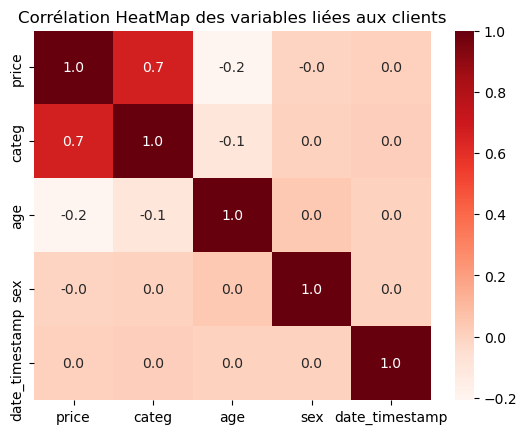

In [89]:
#HeatMap des variables "price", "categ", "age", "sex" et "date_timestamp" pour voir si des premières corrélations linéaires apparaissent
sns.heatmap(df_corr.corr(), annot=True, fmt=".1f", cmap='Reds')
plt.title('Corrélation HeatMap des variables liées aux clients')
plt.show()

On constate avec ce premier test que les prix des produits et les catégories ont une forte corrélation (= 0.7).

<div style="border: 1px solid RGB(170,46,34);" >
<h3 style="margin: auto; padding: 20px; color: RGB(170,46,34); ">8.2 - Lien entre le genre d'un client et les catégories des livres achetés</h3>
</div>

On réalise un test statistique en supposant les hypothèses suivantes :

H0 (hypothèse nulle) : la catégorie de livres achetés ne dépend pas du sexe des clients

H1 (hypothèse alternative) : la catégorie de livres achetés dépend du sexe des clients

In [90]:
# On calcule le chiffre d'affaires pour chaque catégorie et sexe
df_corr_genre_categ2 = df_final.groupby(['categ', 'sex']).agg({'price': 'sum'}).reset_index()

# Pivot du dataframe pour avoir les sexes comme colonnes
df_corr_genre_categ2 = df_corr_genre_categ2.pivot(index='categ', columns='sex', values='price').reset_index()

# On renomme les colonnes
df_corr_genre_categ2 = df_corr_genre_categ2.rename(columns={'f': 'Femme', 'm': 'Homme'})

# On affiche le nouveau dataframe avec la corrélation entre sexe et catégorie
print(df_corr_genre_categ2)

sex  categ       Femme       Homme
0        0  2190013.07  2229717.90
1        1  2449577.57  2378079.54
2        2  1311253.04  1469021.98


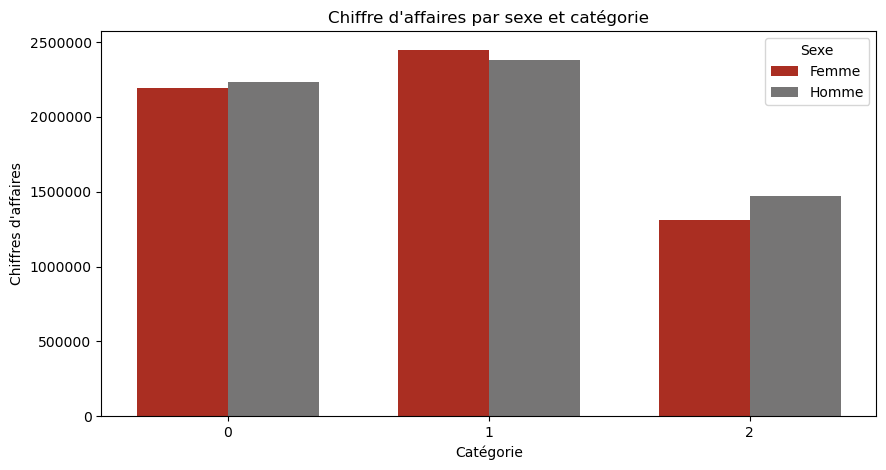

In [91]:
# On définit les données pour l'axe des x et des y
categories = df_corr_genre_categ2["categ"]
ca_femmes = df_corr_genre_categ2["Femme"]
ca_hommes = df_corr_genre_categ2["Homme"]

# Création d'une figure et d'un axe
fig, ax = plt.subplots(figsize = (10,5))

plt.ticklabel_format(axis="y", style="plain")  # Ne pas utiliser la notation scientifique

# Largeur des barres
bar_width = 0.35

# Position des barres
r1 = range(len(categories))
r2 = [x + bar_width for x in r1]

# Création des barres pour les hommes et les femmes
ax.bar(r1, ca_femmes, color='#AA2E22', width=bar_width, label='Femme')
ax.bar(r2, ca_hommes, color='#767575', width=bar_width, label='Homme')

# On ajoute les étiquettes des catégories sur l'axe des x
ax.set_xticks([r + bar_width / 2 for r in r1])
ax.set_xticklabels(categories)

# On ajoute une légende
ax.legend(title="Sexe")

# On ajoute un titre et les labels
plt.title("Chiffre d'affaires par sexe et catégorie")
plt.xlabel("Catégorie")
plt.ylabel("Chiffres d'affaires")

# On affiche le graphique
plt.show()

Il n'y a pas de fortes différences de chiffres d'affaires entre les hommes et les femmes pour chaque catégorie.

Les femmes, ainsi que les hommes, ont le plus dépensé dans la catégorie 1, et ont le moins dépensé dans la catégorie 2.

In [92]:
X = "sex"
Y = "categ"

cont = df_final[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,0,1,2,Total
sex,,,,
f,206103,119307,17283,342693
m,209356,116285,19200,344841
Total,415459,235592,36483,687534


In [93]:
donnees_chi2 = pd.crosstab(df_final['sex'], df_final['categ'])

# On effectue le test de Chi-2
chi2, p_value, dof, expected = chi2_contingency(donnees_chi2)

# On affiche les résultats
print("Statistique de test Chi-2 :", chi2, end="\n\n")
print("Valeur p :", p_value, end="\n\n")
print("Degrés de liberté :", dof)

Statistique de test Chi-2 : 158.25417617304882

Valeur p : 4.320582228399707e-35

Degrés de liberté : 2


La statistique de test Chi-2 évalue l'écart entre les valeurs observées et les valeurs attendues sous l'hypothèse nulle. Une valeur plus élevée de la statistique de test indique un écart plus important entre les variables.

La valeur p est la probabilité d'obtenir une statistique de test aussi extrême ou plus extrême que celle observée, sous l'hypothèse nulle. Dans notre cas, la valeur p est extrêmement faible (4.320582228399707e-35), ce qui signifie que la probabilité d'obtenir une telle statistique de test par hasard est presque nulle.

Les degrés de liberté indiquent le nombre de catégories moins 1. Dans notre cas, nous avons 2 degrés de liberté.

En interprétant ces résultats, compte tenu de la valeur p très faible, on peut conclure que l'hypothèse nulle d'indépendance entre le sexe du client et la catégorie du livre acheté peut être validée. Cela suggère qu'il n'existe pas une association significative entre ces deux variables. La statistique de test élevée renforce cette conclusion.

En résumé, les résultats indiquent qu'il n'y a aucune corrélation entre le sexe du client et la catégorie du livre acheté.

<div style="border: 1px solid RGB(170,46,34);" >
<h3 style="margin: auto; padding: 20px; color: RGB(170,46,34); ">8.3 - Lien entre l'âge des clients et le montant total des achats</h3>
</div>

In [94]:
# On calcule le chiffre d'affaires pour chaque tranche d'âge
df_corr_age_montant = df_final.groupby('tranche_age')['price'].sum().reset_index()

# On renomme les colonnes
df_corr_age_montant.columns = ['tranche_age', 'montant_total']

# On affiche le nouveau dataframe avec la corrélation entre âge et chiffre d'affaires
print(df_corr_age_montant)

      tranche_age  montant_total
0       18-24 ans     1825114.03
1       25-34 ans     2198103.03
2       35-44 ans     3155693.34
3       45-54 ans     2336609.33
4       55-64 ans     1341351.95
5       65-74 ans      803260.67
6       75-84 ans      289091.14
7  85 ans et plus       78439.61


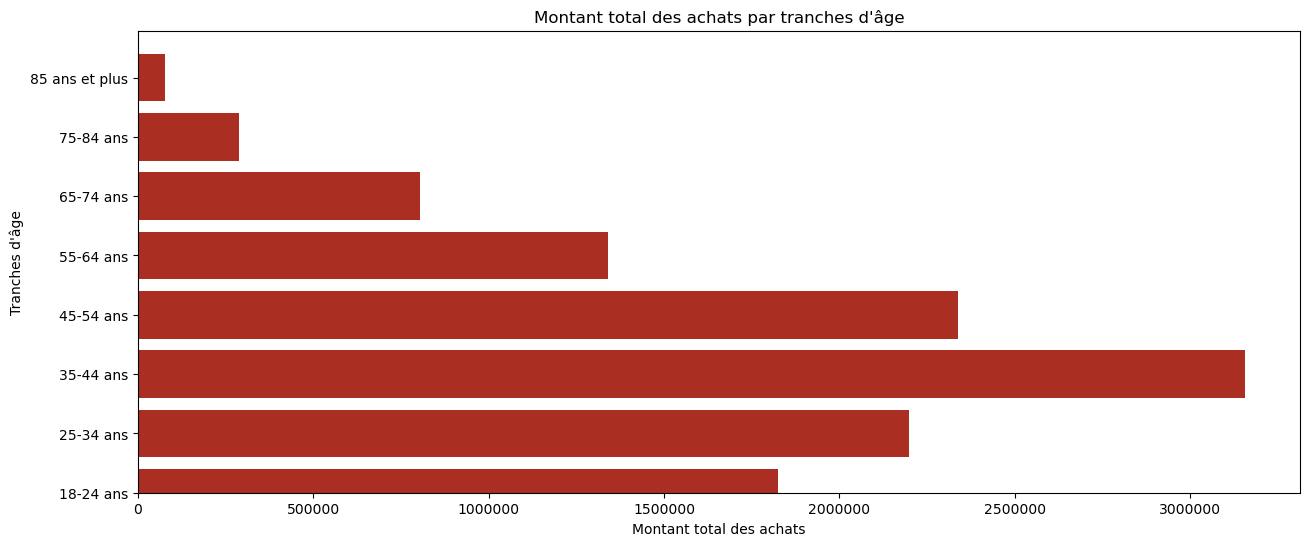

In [95]:
# Création d'un graphique en barre horizontal
plt.figure(figsize = (15,6))
plt.barh(df_corr_age_montant['tranche_age'], df_corr_age_montant['montant_total'], color='#AA2E22')

plt.ticklabel_format(axis="x", style="plain")  # Ne pas utiliser la notation scientifique

# Ajout du titre et des labels
plt.xlabel("Montant total des achats")
plt.ylabel("Tranches d'âge")
plt.title("Montant total des achats par tranches d'âge")
plt.ylim(0)

# Affichage du graphique
plt.show()

On constate que la tranche d'âge qui a plus le grand montant d'achat correspondant aux clients de 35-44ans.

A partir de 55ans, le montant d'achat diminue, mais cela peut-être lié aux nombres bas de clients dans ces tranches d'âge.

In [96]:
# On calcule le chiffre d'affaires pour chaque âge
df_corr_age_montant = df_final.groupby(['age']).agg({'price': 'sum'}).reset_index()

#df_corr_age_montant.head()

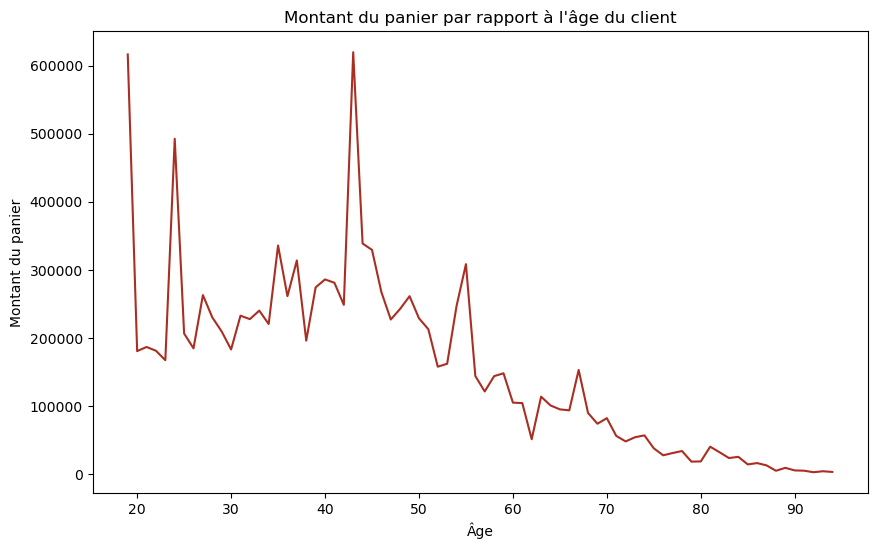

In [97]:
plt.figure(figsize = (10,6))

# Création d'un nuage de points
plt.plot(df_corr_age_montant['age'], df_corr_age_montant['price'], color="#AA2E22")

# Ajout des labels aux axes
plt.xlabel("Âge")
plt.ylabel("Montant du panier")

# Ajout d'un titre au graphique
plt.title("Montant du panier par rapport à l'âge du client")

# Affichage du graphique
plt.show()

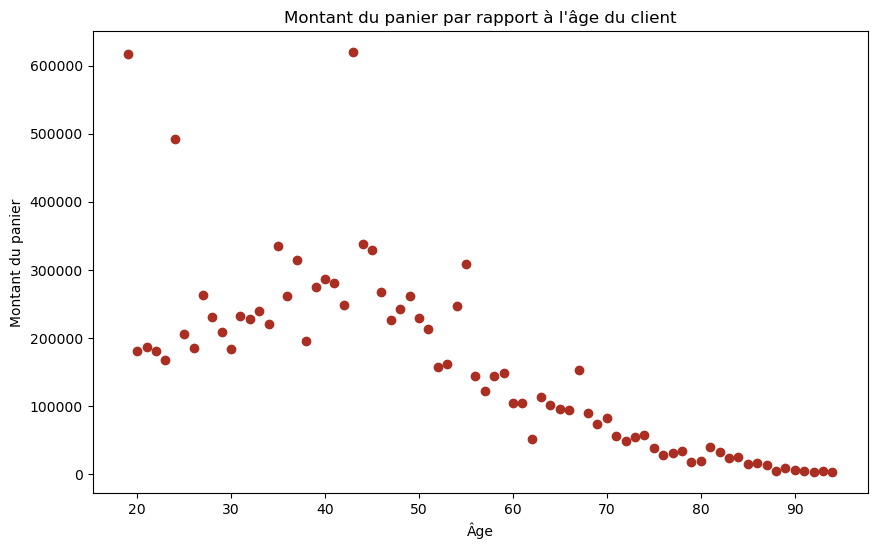

In [98]:
plt.figure(figsize = (10,6))

# Création d'un nuage de points
plt.scatter(df_corr_age_montant['age'], df_corr_age_montant['price'], color="#AA2E22")

# Ajout des labels aux axes
plt.xlabel("Âge")
plt.ylabel("Montant du panier")

# Ajout d'un titre au graphique
plt.title("Montant du panier par rapport à l'âge du client")

# Affichage du graphique
plt.show()

In [99]:
print("Le coefficient de corrélation de Pearson est de :", "{:,.2f}".format(st.pearsonr(df_corr_age_montant["age"],df_corr_age_montant["price"])[0]))

Le coefficient de corrélation de Pearson est de : -0.78


Le coefficient est proche de -1, ce qui prouve une forte corrélation entre l'âge et le montant des achats. 

Comme le coefficient est négatif, on peut en déduire que le montant des achats baisse lorsque l'âge du client augmente.

Néanmoins, on observe une tendance positive entre 20 et 45ans, et une tendance négative à partir de 45ans.

On va calculer à nouveau le coefficient de corrélation de Pearson, mais en enlevant ce coup-ci les 4 clients qui ont un chiffre d'affaires bien plus élevés que les autres clients.

In [100]:
#On créé un dataframe temporaire identique au dataframe df_final
df_final_tmp = df_final

#On retire les 4 clients qui ont un chiffre d'affaires bien supérieurs aux autres (revendeurs ?)
df_final_tmp = df_final_tmp[~df_final_tmp['client_id'].isin(['c_1609', 'c_4958', 'c_6714', 'c_3454'])]

df_corr_age_montant_2 = df_final_tmp.groupby(['age']).agg({'price': 'sum'}).reset_index()

#df_corr_age_montant_2.head()

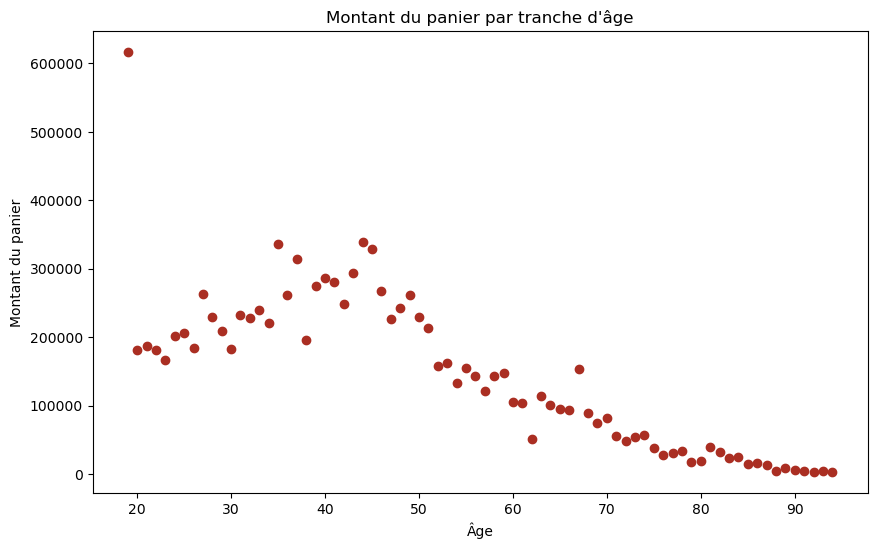

In [101]:
plt.figure(figsize = (10,6))

# Création d'un nuage de points
plt.scatter(df_corr_age_montant_2['age'], df_corr_age_montant_2['price'], color="#AA2E22")

# Ajout des labels aux axes
plt.xlabel("Âge")
plt.ylabel("Montant du panier")

# Ajout d'un titre au graphique
plt.title("Montant du panier par tranche d'âge")

# Affichage du graphique
plt.show()

In [102]:
print("Le coefficient de corrélation de Pearson est de :", "{:,.2f}".format(st.pearsonr(df_corr_age_montant_2["age"],df_corr_age_montant_2["price"])[0]))

Le coefficient de corrélation de Pearson est de : -0.83


In [103]:
#On refait le calcul du coefficient de Pearson pour les clients âgés entre 20 et 44ans
#Car on voit une tendance positive de 20 à 45ans
#Les clients de 19ans ne sont pas pris en compte dans le calcul
df_pearson_moins_45 = df_corr_age_montant_2.loc[(df_corr_age_montant_2['age'] > 19) & (df_corr_age_montant_2['age'] < 45), :]
print("Le coefficient de corrélation de Pearson entre 20 et 44 ans est de :", "{:,.2f}".format(st.pearsonr(df_pearson_moins_45["age"],df_pearson_moins_45["price"])[0]), end="\n\n")

df_pearson_plus_45 = df_corr_age_montant_2.loc[df_corr_age_montant_2['age'] >= 45, :]
print("Le coefficient de corrélation de Pearson entre 45 ans et plus est de :", "{:,.2f}".format(st.pearsonr(df_pearson_plus_45["age"],df_pearson_plus_45["price"])[0]))

Le coefficient de corrélation de Pearson entre 20 et 44 ans est de : 0.77

Le coefficient de corrélation de Pearson entre 45 ans et plus est de : -0.92


Les deux nouveaux coefficient sont proches de 1 et -1, ce qui prouve une forte corrélation entre l'âge et le montant des achats. 

Entre 20 et 44ans, le coefficient est positif, on peut en déduire que le montant des achats augmente entre 20 et 44ans, en même temps que l'âge du client augmente.

Par contre, après 45ans, le coefficient est négatif, on en déduit alors que le montant des achats baisse lorsque l'âge du client augmente.

<div style="border: 1px solid RGB(170,46,34);" >
<h3 style="margin: auto; padding: 20px; color: RGB(170,46,34); ">8.4 - Lien entre l'âge des clients et la fréquence d'achat</h3>
</div>

In [104]:
# Calcul du nombre d'achat pour chaque client
#freq_achat = df_final.groupby('client_id').count().reset_index(name="nombre_achat")
df_corr_client_freq_achat = df_final.groupby(['client_id']).agg({'date': 'count', 'age': 'first', 'tranche_age': 'first'}).reset_index()
df_corr_client_freq_achat.columns = ['client_id', 'nombre_achat', 'age', 'tranche_age']

#Ajout de la fréquence d'achat pour chaque client en divisant le nombre d'achat par 24 mois
df_corr_client_freq_achat['freq_achat'] = 730 /df_corr_client_freq_achat['nombre_achat']

# Affichage du résultat
print(df_corr_client_freq_achat)

     client_id  nombre_achat  age tranche_age  freq_achat
0          c_1            43   68   65-74 ans   16.976744
1         c_10            58   67   65-74 ans   12.586207
2        c_100             8   31   25-34 ans   91.250000
3       c_1000           126   57   55-64 ans    5.793651
4       c_1001           103   41   35-44 ans    7.087379
...        ...           ...  ...         ...         ...
8595     c_995            14   68   65-74 ans   52.142857
8596     c_996            96   53   45-54 ans    7.604167
8597     c_997            59   29   25-34 ans   12.372881
8598     c_998            55   22   18-24 ans   13.272727
8599     c_999            46   59   55-64 ans   15.869565

[8600 rows x 5 columns]


In [105]:
df_corr_client_freq_achat.nlargest(20, 'freq_achat')

,client_id,nombre_achat,age,tranche_age,freq_achat
694,c_1624,1,31,25-34 ans,730.0
3576,c_4223,1,72,65-74 ans,730.0
3855,c_4478,1,53,45-54 ans,730.0
4044,c_4648,1,19,18-24 ans,730.0
5868,c_6292,1,31,25-34 ans,730.0
8151,c_8351,1,55,55-64 ans,730.0
259,c_1232,2,63,55-64 ans,365.0
459,c_1412,2,30,25-34 ans,365.0
962,c_1866,2,30,25-34 ans,365.0
1102,c_1992,2,67,65-74 ans,365.0


In [106]:
#Sélection des fréquences d'achat pour chaque tranche d'âge
freq_tranche_18_24 = df_corr_client_freq_achat.loc[df_corr_client_freq_achat['tranche_age'] == '18-24 ans', 'freq_achat']
freq_tranche_25_34 = df_corr_client_freq_achat.loc[df_corr_client_freq_achat['tranche_age'] == '25-34 ans', 'freq_achat']
freq_tranche_35_44 = df_corr_client_freq_achat.loc[df_corr_client_freq_achat['tranche_age'] == '35-44 ans', 'freq_achat']
freq_tranche_45_54 = df_corr_client_freq_achat.loc[df_corr_client_freq_achat['tranche_age'] == '45-54 ans', 'freq_achat']
freq_tranche_55_64 = df_corr_client_freq_achat.loc[df_corr_client_freq_achat['tranche_age'] == '55-64 ans', 'freq_achat']
freq_tranche_65_74 = df_corr_client_freq_achat.loc[df_corr_client_freq_achat['tranche_age'] == '65-74 ans', 'freq_achat']
freq_tranche_75_84 = df_corr_client_freq_achat.loc[df_corr_client_freq_achat['tranche_age'] == '75-84 ans', 'freq_achat']
freq_tranche_85_plus = df_corr_client_freq_achat.loc[df_corr_client_freq_achat['tranche_age'] == '85 ans et plus', 'freq_achat']

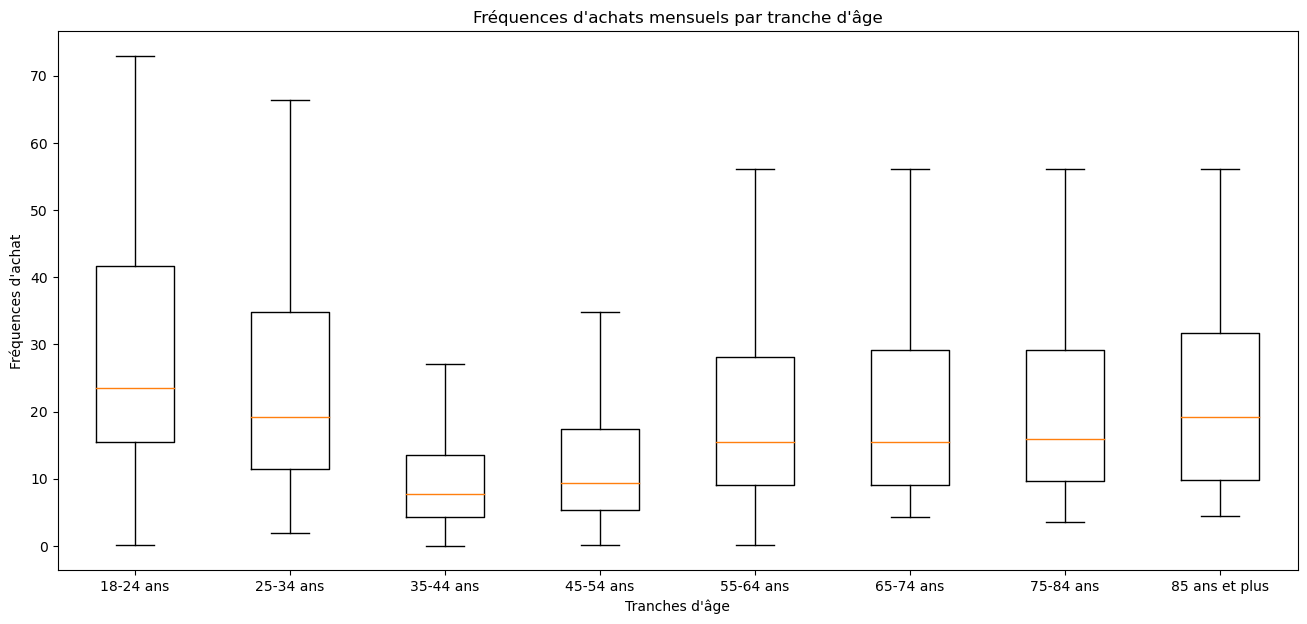

In [107]:
#Création d'une liste des prix par catégorie
freq_achat_par_tranche_age = [freq_tranche_18_24, freq_tranche_25_34, freq_tranche_35_44, freq_tranche_45_54, freq_tranche_55_64, freq_tranche_65_74, freq_tranche_75_84, freq_tranche_85_plus]

plt.figure(figsize = (16,7))

# Création du graphique des boxplots
plt.boxplot(freq_achat_par_tranche_age, labels=['18-24 ans', '25-34 ans', '35-44 ans', '45-54 ans', '55-64 ans', '65-74 ans', '75-84 ans', '85 ans et plus'], showfliers=False)

# Ajout des labels et d'un titre
plt.xlabel("Tranches d'âge")
plt.ylabel("Fréquences d'achat")
plt.title("Fréquences d'achats mensuels par tranche d'âge")

# Affichage du graphique
plt.show()

In [108]:
#Calcul du rapport de corrélation entre la tranche d'âge et la fréquence d'achat

X = "tranche_age" # qualitative
Y = "freq_achat" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(df_corr_client_freq_achat[X],df_corr_client_freq_achat[Y])

0.05656170691124539

Le rapport de corrélation entre la fréquence d'achat et la tranche d'âge est proche de 0, ce qui signifie qu'il n'y a à priori pas de relation entre ces deux variables.

<div style="border: 1px solid RGB(170,46,34);" >
<h3 style="margin: auto; padding: 20px; color: RGB(170,46,34); ">8.5 - Lien entre l'âge des clients et la taille du panier moyen</h3>
</div>

In [109]:
#On créé un dataframe intermédiaire en calculant la somme du panier par client et par date
df_corr_age_panier_moyen_tmp = df_final.groupby(['client_id', 'date']).agg({'price': 'sum', 'tranche_age': 'first'}).reset_index()

#On calcule ensuite le panier moyen par tranche d'âge
df_corr_age_panier_moyen = df_corr_age_panier_moyen_tmp.groupby(['tranche_age']).agg({'price' : 'mean'}).reset_index()

print(df_corr_age_panier_moyen)

      tranche_age      price
0       18-24 ans  81.598517
1       25-34 ans  52.831395
2       35-44 ans  37.029527
3       45-54 ans  32.665231
4       55-64 ans  28.457663
5       65-74 ans  25.514108
6       75-84 ans  25.751928
7  85 ans et plus  25.768597


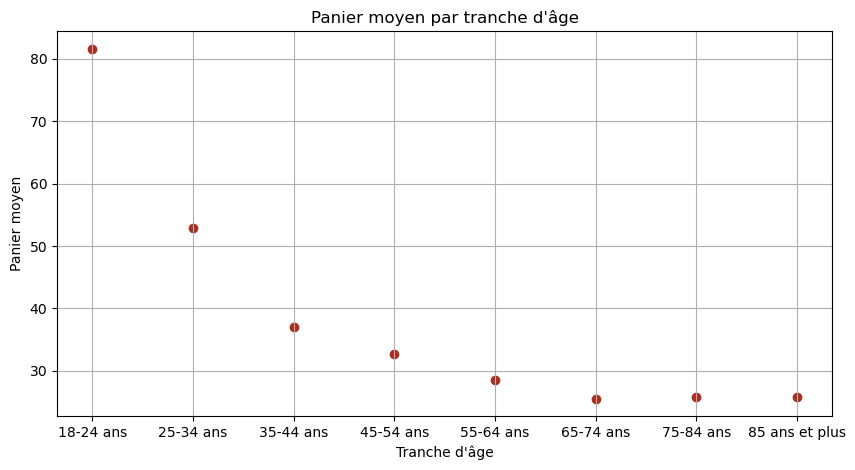

In [110]:
plt.figure(figsize = (10,5))

# Création du graphique à points
plt.scatter(df_corr_age_panier_moyen['tranche_age'], df_corr_age_panier_moyen['price'], color='#AA2E22')

# Ajout des labels aux axes
plt.xlabel("Tranche d'âge")
plt.ylabel("Panier moyen")

# Ajout d'un titre au graphique
plt.title("Panier moyen par tranche d'âge")

# Affichage de la grille
plt.grid(True)

# Affichage du graphique
plt.show()

In [111]:
#Calcul du rapport de corrélation entre la tranche d'âge et le montant du panier moyen

X = "tranche_age" # qualitative
Y = "price" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(df_corr_age_panier_moyen[X],df_corr_age_panier_moyen[Y])

1.0

Le rapport de corrélation entre la fréquence d'achat et la tranche d'âge est égal à 1, ce qui signifie qu'il y a une relation entre ces deux variables.

<div style="border: 1px solid RGB(170,46,34);" >
<h3 style="margin: auto; padding: 20px; color: RGB(170,46,34); ">8.6 - Lien entre l'âge des clients et la catégorie des livres achetés</h3>
</div>

In [112]:
#On calcule le chiffre d'affaires pour chaque catégorie et tranche d'âge
df_corr_age_categorie = df_final.groupby(['categ', 'tranche_age']).agg({'price': 'sum'}).reset_index()

# On affiche le nouveau dataframe avec la corrélation entre âge et catégorie
print(df_corr_age_categorie)

    categ     tranche_age       price
0       0       18-24 ans    91974.45
1       0       25-34 ans   503681.27
2       0       35-44 ans  1912771.95
3       0       45-54 ans  1215501.20
4       0       55-64 ans   378824.32
5       0       65-74 ans   217435.31
6       0       75-84 ans    78362.98
7       0  85 ans et plus    21179.49
8       1       18-24 ans   351929.72
9       1       25-34 ans   554817.91
10      1       35-44 ans  1168254.72
11      1       45-54 ans  1061444.06
12      1       55-64 ans   887268.73
13      1       65-74 ans   552118.87
14      1       75-84 ans   198157.48
15      1  85 ans et plus    53665.62
16      2       18-24 ans  1381209.86
17      2       25-34 ans  1139603.85
18      2       35-44 ans    74666.67
19      2       45-54 ans    59664.07
20      2       55-64 ans    75258.90
21      2       65-74 ans    33706.49
22      2       75-84 ans    12570.68
23      2  85 ans et plus     3594.50


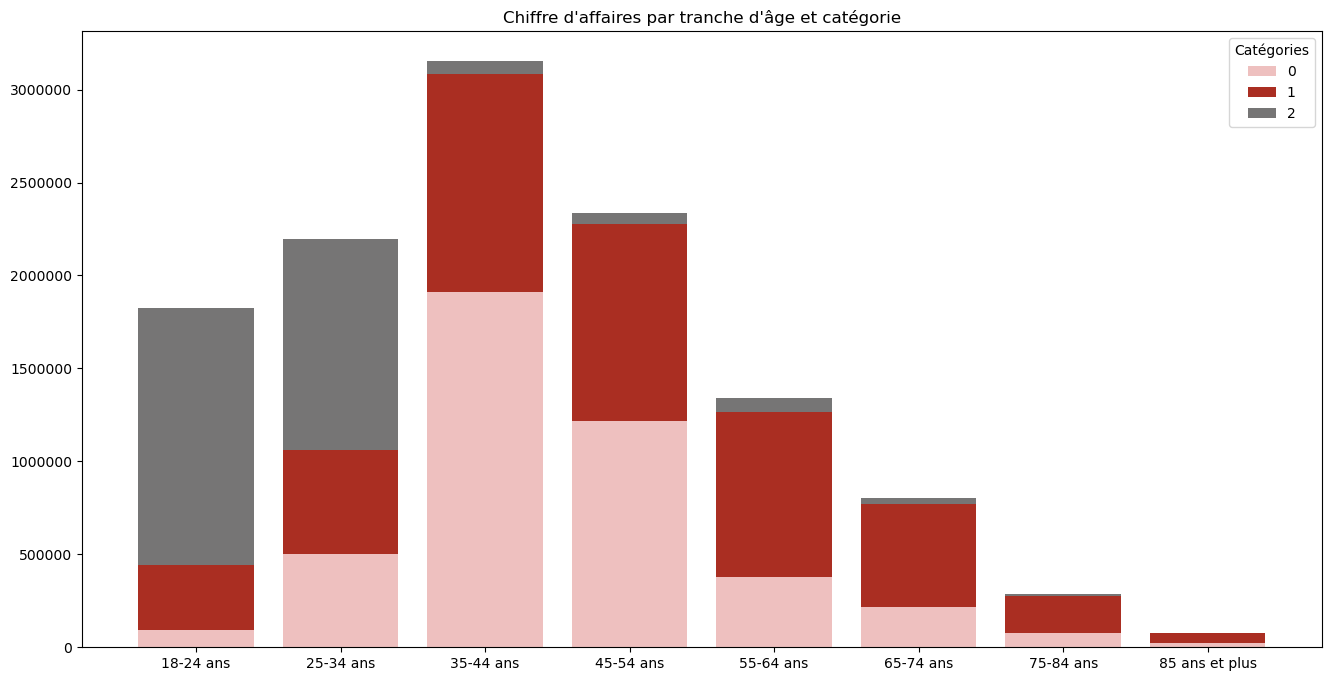

In [113]:
# On utilise la méthode pivot pour transformer les données
df_pivot = df_corr_age_categorie.pivot(index='tranche_age', columns='categ', values='price')

# On crée une liste des catégories
categories = df_corr_age_categorie['categ'].unique()

# On crée une figure et un axe
fig, ax = plt.subplots(figsize = (16,8))

plt.ticklabel_format(style='plain')  # Ne pas utiliser la notation scientifique

# On crée les barres empilées
bottom = None
i = 0
for category in categories:
    values = df_pivot[category].values
    if bottom is None:
        ax.bar(df_pivot.index, values, label=category, color=colors[i])
        bottom = values
    else:
        ax.bar(df_pivot.index, values, bottom=bottom, label=category, color=colors[i])
        bottom += values
    i = i+1

# On ajoute une légende
ax.legend(title="Catégories")

# On ajoute un titre
plt.title("Chiffre d'affaires par tranche d'âge et catégorie")

# On affiche le graphique
plt.show()

La catégorie 0 a le plus de chiffres d'affaires chez les 35-54ans.

Le catégorie 1 a le plus de chiffres d'affaires chez les 35-74ans.

La catégorie 2 a le plus de chiffres d'affaires chez les 18-34ans.

In [114]:
X2 = "tranche_age"
Y2 = "categ"

cont2 = df_final[[X2,Y2]].pivot_table(index=X2,columns=Y2,aggfunc=len,margins=True,margins_name="Total")
cont2

categ,0,1,2,Total
tranche_age,,,,
18-24 ans,8600,17095,18300,43995
25-34 ans,47213,26984,15103,89300
35-44 ans,179833,57207,815,237855
45-54 ans,114655,51799,679,167133
55-64 ans,35417,43190,958,79565
65-74 ans,20398,27065,400,47863
75-84 ans,7330,9663,178,17171
85 ans et plus,2013,2589,50,4652
Total,415459,235592,36483,687534


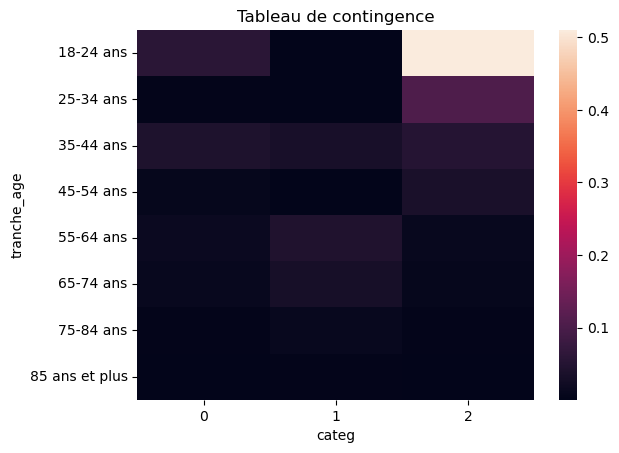

In [115]:
tx2 = cont2.loc[:,["Total"]]
ty2 = cont2.loc[["Total"],:]
n2 = len(df_final)
indep2 = tx2.dot(ty2) / n2

c2 = cont2.fillna(0) # On remplace les valeurs nulles par 0
measure2 = (c2-indep2)**2/indep2
xi_n2 = measure2.sum().sum()
table2 = measure2/xi_n2
sns.heatmap(table2.iloc[:-1,:-1],annot=False)

plt.title("Tableau de contingence")
plt.show()